# 0-5 Hand Sign Classifier Using Fine-Tuning Transfer Learning ✋👌

Welcome to the 0-5 Hand Sign classification using Transfer Learning project.

This project is next-in-line to the [Hand Sign Classification](https://github.com/PranayJagtap06/ML_Projects/blob/main/Hand_Signs_Classification/hand_signs_multiclasss_classification.ipynb) project.

In this projects I'll use the same dataset as in the previous project, but this time I'll train a model with Fine-Tuning Transfer Learning on [EfficientNetB0](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB0) model from TensorFlow.

I'll set the top 10 layers of the EfficientNetB0 model as trainable, and most probably data augmentation, and compare it performance with the preivous model.

I'll also use [DagsHub's](https://www.dagshub.com) MLflow server for model tracking and later for model deployment.

Here are the performance metrics of the preivous model on test set:
 - **Test set loss: 32.83%**
 - **Test set accuracy: 88.33%**
 - **Test set Categorical Accuracy: 1.0**
 - **Test set Precision: 88.33%**
 - **Test set Recall: 88.33%**
 - **Test set F1Scores:**
     - *Hand Sign 0 score: 100.00%*
     - *Hand Sign 1 score: 96.55%*
     - *Hand Sign 2 score: 71.43%*
     - *Hand Sign 3 score: 80.00%*
     - *Hand Sign 4 score: 87.50%*
     - *Hand Sign 5 score: 84.21%*
 - **Test set AUC-ROC score: 93.00%**
 - **Classification Report:**
    Test set Classification Report:

              precision    recall  f1-score   support

 hand sign 0       1.00      1.00      1.00        11
 hand sign 1       0.93      1.00      0.97        14
 hand sign 2       0.71      0.71      0.71         7
 hand sign 3       1.00      0.67      0.80        12
 hand sign 4       0.78      1.00      0.88         7
 hand sign 5       0.80      0.89      0.84         9

   micro avg       0.88      0.88      0.88        60
   macro avg       0.87      0.88      0.87        60
weighted avg       0.90      0.88      0.88        60
 samples avg       0.88      0.88      0.88        60

 So let's jump start...

# Downloading, Loading and Preprocessing the Dataset

I already given an intro about the dataset I'm using in the previous [project](https://github.com/PranayJagtap06/ML_Projects/blob/main/Hand_Signs_Classification/hand_signs_multiclasss_classification.ipynb), you can visit there for the dataset intro.

Here I'll directly load the dataset.

## Downloading & Loading the Dataset

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://github.com/PranayJagtap06/ML_Projects/archive/main.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("main.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-07-04 13:17:47--  https://github.com/PranayJagtap06/ML_Projects/archive/main.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/PranayJagtap06/ML_Projects/zip/refs/heads/main [following]
--2024-07-04 13:17:47--  https://codeload.github.com/PranayJagtap06/ML_Projects/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: 'main.zip'

main.zip                [         <=>        ]  45.61M  14.6MB/s    in 3.1s    

2024-07-04 13:17:51 (14.6 MB/s) - 'main.zip' saved [47823871]



In [2]:
# Unzip dataset file
zip_ref = zipfile.ZipFile("/kaggle/working/ML_Projects-main/Hand_Signs_Classification/archive.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
# installing mlflow and dagshub[jupyter]
!pip install mlflow dagshub[jupyter]

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 39.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 43.7 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.3 MB/s e

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import h5py
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve

import os
import mlflow
import dagshub
import tempfile
from urllib.parse import urlparse

import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'
pio.templates.default = 'seaborn'

2024-07-04 13:18:27.921574: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 13:18:27.921716: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 13:18:28.029862: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
# Loading train and test dataset
with h5py.File('train.h5', 'r') as f:
    data_Xtrain = f['train_set_x'][:]
    data_ytrain = f['train_set_y'][:]
    classes_train = f['list_classes'][:]

with h5py.File('test.h5', 'r') as f:
    data_Xtest = f['test_set_x'][:]
    data_ytest = f['test_set_y'][:]
    classes_test = f['list_classes'][:]

## Preprocessing and Creating Validation & Test sets

Here I'll only resize the dataset as EfficientNetB0 has an ib-built normalizing layer.

### Preprocessing

In [6]:
data_Xtrain = tf.keras.preprocessing.image.smart_resize(data_Xtrain, size=(224, 224))
data_Xtest = tf.keras.preprocessing.image.smart_resize(data_Xtest, size=(224, 224))

data_Xtrain.shape, data_Xtest.shape

((1080, 224, 224, 3), (120, 224, 224, 3))

### Splitting Test Data

In [7]:
# creating validation and test set
X_val, X_test, y_val, y_test = train_test_split(data_Xtest, data_ytest, test_size=0.5, stratify=data_ytest, random_state=42)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(1)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(1)

# Model Building Workflow

I'll follow a workflow to train the model:

 - Step1: Build and train a base model with Keras Functional API and data augmentation layer, with EfficientNetB0 as a base model, on only 10% of training data with Feature Extraction Transfer Learning.
 - Step2: Fine-Tune the base model on 10% of training data by making top 10 layers of EfficientNetB0 model as trainable and reducing the learning rate by -10%.
 - Step3: Re-train the fine-tuned base model on 100% of training data.

 Also each time I train a model I'll evaluate the trained model.

Let's start model building...

# ***Step1: Building & Train Base `model` on 10% Training Data (Feature Extraction Transfer Learning)***

## `model` Building & Training

In [101]:
# Creating a base model for our model
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False

In [102]:
# Creating a data augmentation layer for our model
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2)
], name = "data_augmentation")

In [103]:
input_shape = (224, 224, 3)

inputs = tf.keras.layers.Input(shape=input_shape, batch_size=32, name="input_layer")
x_ = data_augmentation(inputs)
x_ = base_model(x_, training=False)
x_ = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x_)
outputs = tf.keras.layers.Dense(6, activation="softmax", name="output_layer")(x_)
model = tf.keras.Model(inputs, outputs)

In [104]:
# Compiling model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [105]:
checkpoint_path = "model_checkpoints_weights/checkpoint.weights.h5" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback= tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         monitor="val_sparse_categorical_accuracy",
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [106]:
# Fitting model with 10% training data
tf.random.set_seed(42)
hist_model10_percent = model.fit(data_Xtrain[:int(0.25*len(data_Xtrain))],
                       data_ytrain[:int(0.25*len(data_ytrain))],
                       epochs=5,
                       validation_data=val_dataset,
                       callbacks=[checkpoint_callback]
                       )

Epoch 1/5


2024-07-04 13:34:53.855027: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_17_1/efficientnetb0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 1.7359 - sparse_categorical_accuracy: 0.1941
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.53333, saving model to model_checkpoints_weights/checkpoint.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 700ms/step - loss: 1.7318 - sparse_categorical_accuracy: 0.2028 - val_loss: 1.5515 - val_sparse_categorical_accuracy: 0.5333
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 1.4939 - sparse_categorical_accuracy: 0.5050
Epoch 2: val_sparse_categorical_accuracy improved from 0.53333 to 0.55000, saving model to model_checkpoints_weights/checkpoint.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - loss: 1.4898 - sparse_categorical_accuracy: 0.5090 - val_loss: 1.4008 - val_sparse_categorical_accuracy: 0.5500
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 1.2958 - sparse_categorical_accuracy: 0.6097
Epoch 3: val_sparse_categorical_accuracy improved from 0.55000 to 0.68333, saving model to model_checkpoints_weights/check

## Evaluating `model` with Feature Extraction Transfer Learning

Creating a function to plot loss and accuracy curves...

In [14]:
def plot_curves(history , img_name: str):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['sparse_categorical_accuracy']
    val_accuracy = history.history['val_sparse_categorical_accuracy']

    epochs = range(len(history.history['loss']))

    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(5, 4)
    fig.set_dpi(300)
    ax[0].plot(epochs, loss, label='training loss')
    ax[0].plot(epochs, val_loss, label='val loss')
    ax[0].set_title('Loss')
    ax[0].set_ylabel('loss')
    ax[0].set_xlabel('epoch')
    ax[0].legend()
    ax[1].plot(epochs, accuracy, label='training accuracy')
    ax[1].plot(epochs, val_accuracy, label='val accuracy')
    ax[1].set_title('Accuracy')
    ax[1].set_ylabel('accuracy')
    ax[1].set_xlabel('epoch')
    ax[1].legend()

    # for x in ax.flat:
    #     x.set(xlabel='epoch')

    plt.tight_layout()
    # plt.legend()
    plt.savefig(img_name, dpi=250)

In [15]:
!mkdir HSC

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



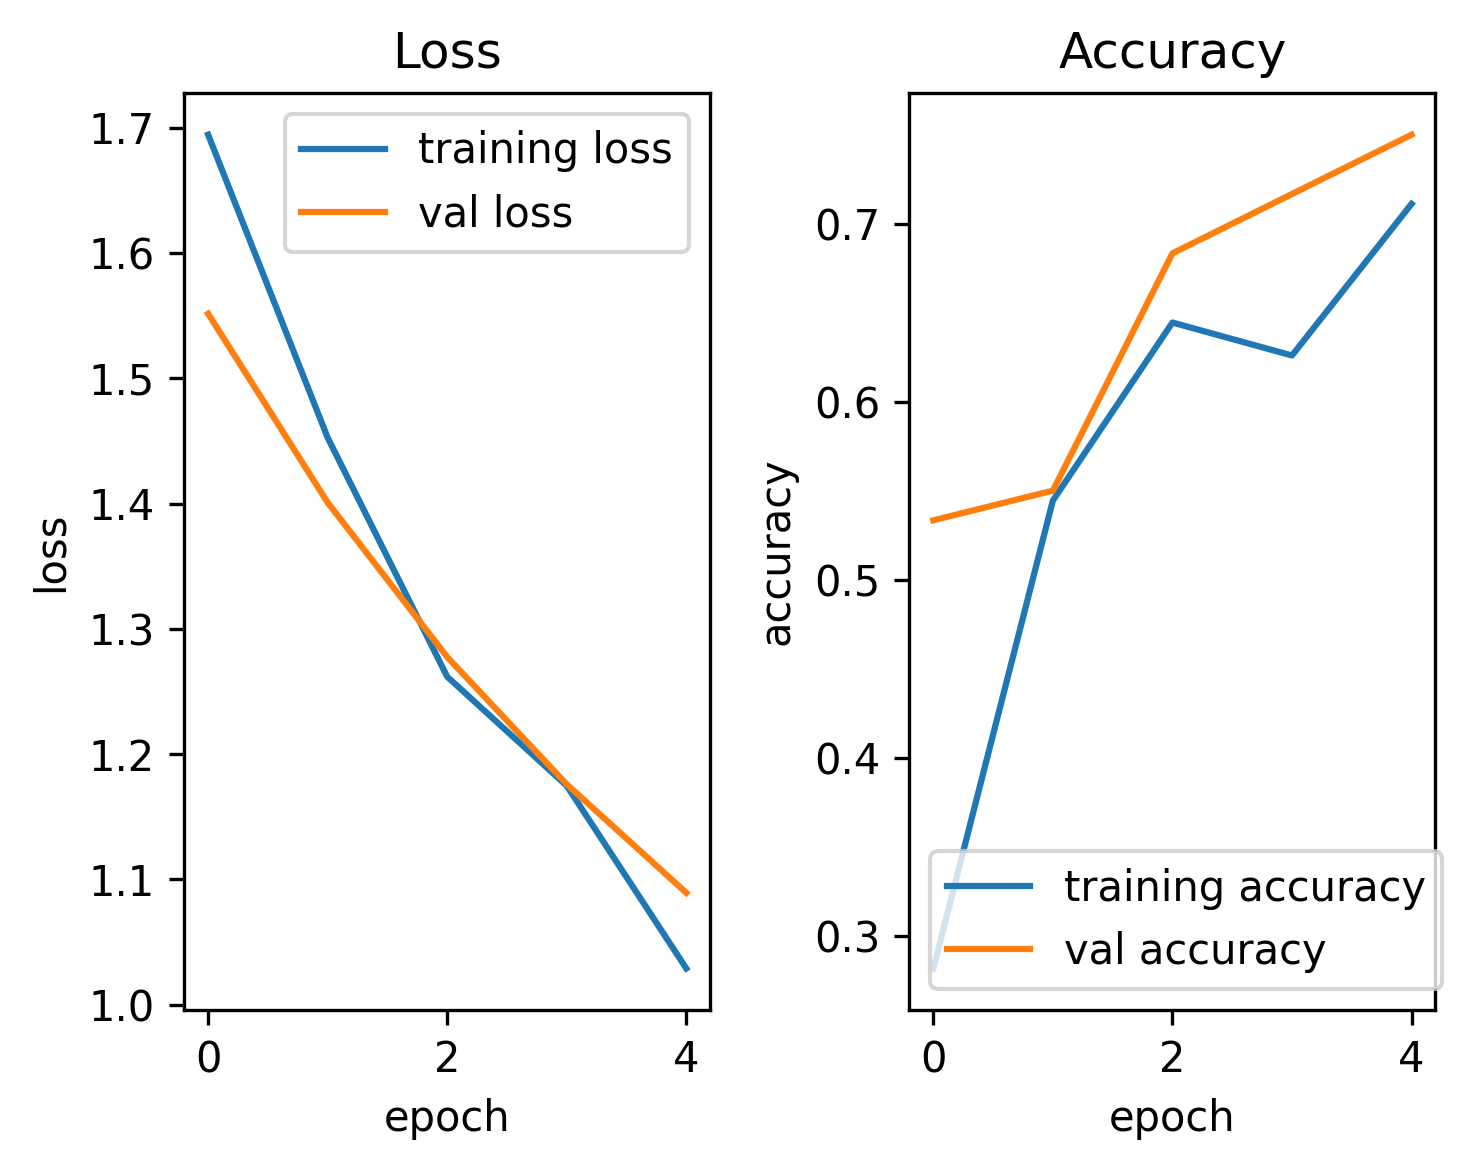

In [107]:
# Plotting Loss & Accuracy Curves
plot_curves(hist_model10_percent, img_name="HSC/model_10%_la.png")

**Loss and Accuracy Plot:**
 - The training loss and validation loss decreases steadily over epochs, with validation loss closely following training loss.
 - Both training and validation accuracy increase over time, with validation accuracy slightly outperforming training accuracy.
 - There's no clear sign of overfitting as validation metrics closely follow training metrics.

In [115]:
for key, value in model.evaluate(val_dataset, return_dict=True).items():
    print(f"Validation set {key}: {value*100:.2f}%")

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0231 - sparse_categorical_accuracy: 0.7986
Validation set loss: 108.92%
Validation set sparse_categorical_accuracy: 75.00%


Validation loss of 108.92% seems unusually high and may need investigation.

Validation accuracy of 75.00% indicates room for improvement.

In [116]:
# Saving val_loss & val_sparse_categorical_accuracy for future reference
val_loss, val_sparse_categorical_accuracy = hist_model10_percent.history["val_loss"], hist_model10_percent.history["val_sparse_categorical_accuracy"]

In [117]:
# Making predictions
pred_val = model.predict(X_val, batch_size=1)

60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [118]:
print(f"Validation set Categorical Accuracy: {tf.keras.metrics.categorical_accuracy(y_val, tf.argmax(pred_val, axis=1).numpy()).numpy()}")

Validation set Categorical Accuracy: 1.0


A score of 1.0 means that the model has correctly classified every single sample in the validation set, with no errors or misclassifications.

In [119]:
# Evaluating Precission
precission_vals = []
print("Validation set Precission")
for j in range(6):
    val_precision = tf.keras.metrics.Precision(class_id=j)
    i = np.round(val_precision(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred_val), axis=1).numpy(), depth=6)).numpy()*100, 2)
    precission_vals.append(i)
    print(f"\tsign_{j}_precission: {i}%")
sign_0_precission, sign_1_precission, sign_2_precission, sign_3_precission, sign_4_precission, sign_5_precission = precission_vals

Validation set Precission
	sign_0_precission: 71.43%
	sign_1_precission: 90.0%
	sign_2_precission: 87.5%
	sign_3_precission: 100.0%
	sign_4_precission: 64.29%
	sign_5_precission: 55.56%


In [120]:
# Evaluating Recall
recall_vals = []
print("Validation set Recall")
for j in range(6):
    val_recall = tf.keras.metrics.Recall(class_id=j)
    i = np.round(val_recall(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred_val), axis=1).numpy(), depth=6)).numpy()*100, 2)
    recall_vals.append(i)
    print(f"\tsign_{j}_recall: {i}%")
sign_0_recall, sign_1_recall, sign_2_recall, sign_3_recall, sign_4_recall, sign_5_recall = recall_vals

Validation set Recall
	sign_0_recall: 100.0%
	sign_1_recall: 90.0%
	sign_2_recall: 70.0%
	sign_3_recall: 50.0%
	sign_4_recall: 90.0%
	sign_5_recall: 50.0%


In [121]:
# Evaluating Validation set F1 score
val_f1_score = tf.keras.metrics.F1Score()
scores = np.round(val_f1_score(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred_val), axis=1).numpy(), depth=6)).numpy()*100, 2)
sign_0_f1, sign_1_f1, sign_2_f1, sign_3_f1, sign_4_f1, sign_5_f1 = scores

print("Validation set F1Scores:")
for i, j in enumerate(scores):
    print(f"\tHand sign_{i}_f1: {j:.2f}%")

Validation set F1Scores:
	Hand sign_0_f1: 83.33%
	Hand sign_1_f1: 90.00%
	Hand sign_2_f1: 77.78%
	Hand sign_3_f1: 66.67%
	Hand sign_4_f1: 75.00%
	Hand sign_5_f1: 52.63%


In [122]:
# Evaluating Validation set AUC score
val_auc = tf.keras.metrics.AUC()
val_auc.update_state(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred_val), axis=1).numpy(), depth=6))
auc_score = np.round(val_auc.result().numpy()*100, 2)
print(f"Validation set AUC-ROC score: {(val_auc.result().numpy()*100):.2f}%")

Validation set AUC-ROC score: 85.00%


AUC-ROC score of 85.00% suggests good overall discrimination ability.

In [123]:
# Validation set Classification report
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
target_names = ['hand sign 0', 'hand sign 1', 'hand sign 2', 'hand sign 3', 'hand sign 4', 'hand sign 5']
print(f"Validation set Classification Report:\n\n{classification_report(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred_val), axis=1).numpy(), depth=6), target_names=target_names)}")

Validation set Classification Report:

              precision    recall  f1-score   support

 hand sign 0       0.71      1.00      0.83        10
 hand sign 1       0.90      0.90      0.90        10
 hand sign 2       0.88      0.70      0.78        10
 hand sign 3       1.00      0.50      0.67        10
 hand sign 4       0.64      0.90      0.75        10
 hand sign 5       0.56      0.50      0.53        10

   micro avg       0.75      0.75      0.75        60
   macro avg       0.78      0.75      0.74        60
weighted avg       0.78      0.75      0.74        60
 samples avg       0.75      0.75      0.75        60



**Classification Report:**

 1. Hand sign 0:
  - Good recall (1.00) but lower precision (0.71), indicating some false positives. 
  - F1-score of 0.83 shows good performance with room for improvement in precision.


 2. Hand sign 1: 
  - Excellent performance with high precision (0.90) and recall (0.90). 
  - F1-score of 0.90 indicates strong and balanced performance.


 3. Hand sign 2: 
  - Good precision (0.88) but lower recall (0.70), indicating some missed positives. 
  - F1-score of 0.78 suggests good performance with room for improvement in recall.


 4. Hand sign 3: 
  - Perfect precision (1.00) but lower recall (0.50), indicating many missed positives. 
  - F1-score of 0.67 suggests potential for significant improvement, particularly in recall.


 5. Hand sign 4:
  - Good precision (0.64) and high recall (0.90). 
  - F1-score of 0.75 indicates good performance with some room for improvement in precision.


 6. Hand sign 5: 
  - Lower precision (0.56) and recall (0.50), indicating both false positives and missed positives. 
  - F1-score of 0.53 suggests potential for significant improvement in both precision and recall.

Overall, the model performs well on some hand signs (e.g., Hand sign 1) but struggles with others (e.g., Hand sign 3 and Hand sign 5). The average performance metrics (micro, macro, weighted, and samples avg) indicate that the model has some room for improvement overall.

Validation Set Confusion Matrix



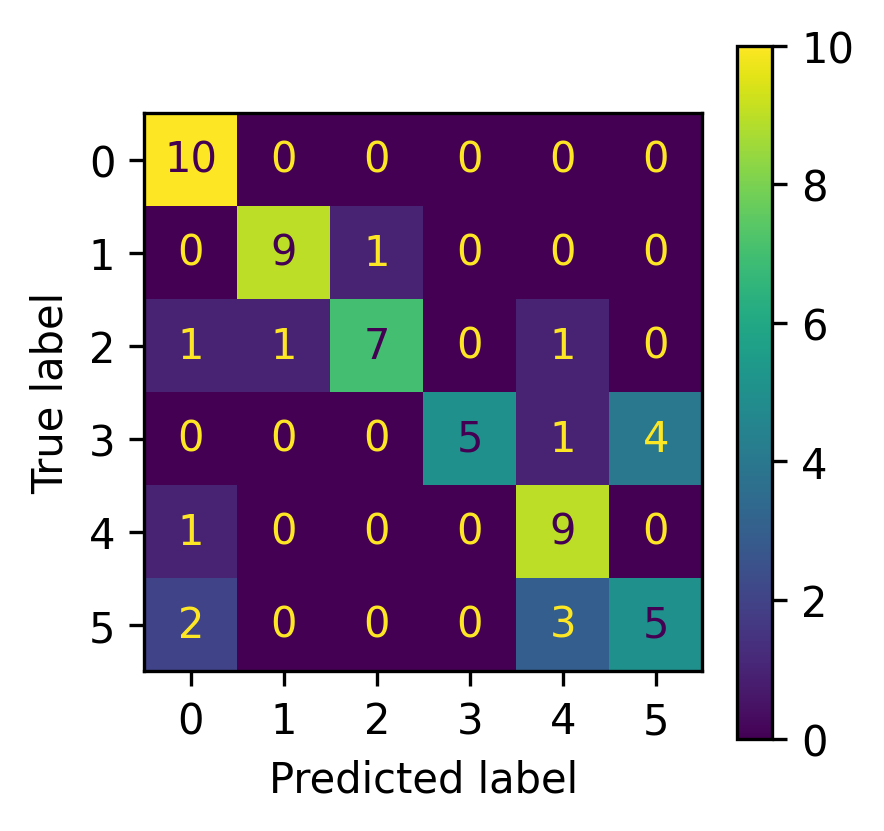

In [124]:
# Validation set Confusion Matrix
print('Validation Set Confusion Matrix\n')
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
val_cmd = ConfusionMatrixDisplay(confusion_matrix(y_val, tf.argmax(pred_val, axis=1).numpy()), display_labels=classes_train)
val_cmd.plot(ax=ax);

**Confusion Matrix:**
 - The diagonal elements show correct classifications, with off-diagonal elements representing misclassifications.
 - Sign 0 have perfect classification (10/10 correct).
 - Signs 1, 2, 3, 4, and 5 show some misclassifications, particularly between each other.

In [125]:
# Saving Matrix
val_cmd.figure_.savefig('HSC/model_10%_val_cmd.png')

In [126]:
# Creating onehot labels from classes
labels_onehot = tf.keras.utils.to_categorical(y_val, 6)

In [127]:
# Creating functions to plot Precission Recall curves
def precission_recall_lists(pred: np.ndarray, labels: np.ndarray) -> tuple:
    precision = {}
    recall = {}
    # f1 = {}
    for i in range(6):
        y_pred = pred[:, i]
        y_true = labels_onehot[:, i]
        p, r, _ = precision_recall_curve(y_true, y_pred)
        precision[i] = p
        recall[i] = r
        # f1[i] = 2 * (p * r) / (p + r)
    return precision, recall

In [128]:
def plot_precission_recall(precission: dict, recall: dict, img_name: str):
    fig, ax = plt.subplots(3, 2)
    fig.set_size_inches(6, 6)
    fig.set_dpi(200)
    for i in range(6):
        m, n = divmod(i, 2)
        ax[m, n].plot(recall[i], precision[i], label=f"Sign {i}")
        ax[m, n].set_title(f"Sign {i} Precission Recall Curve")
        ax[m, n].set_xlabel("Recall")
        ax[m, n].set_ylabel("Precission")
    plt.tight_layout()
    plt.savefig(img_name, dpi=250)

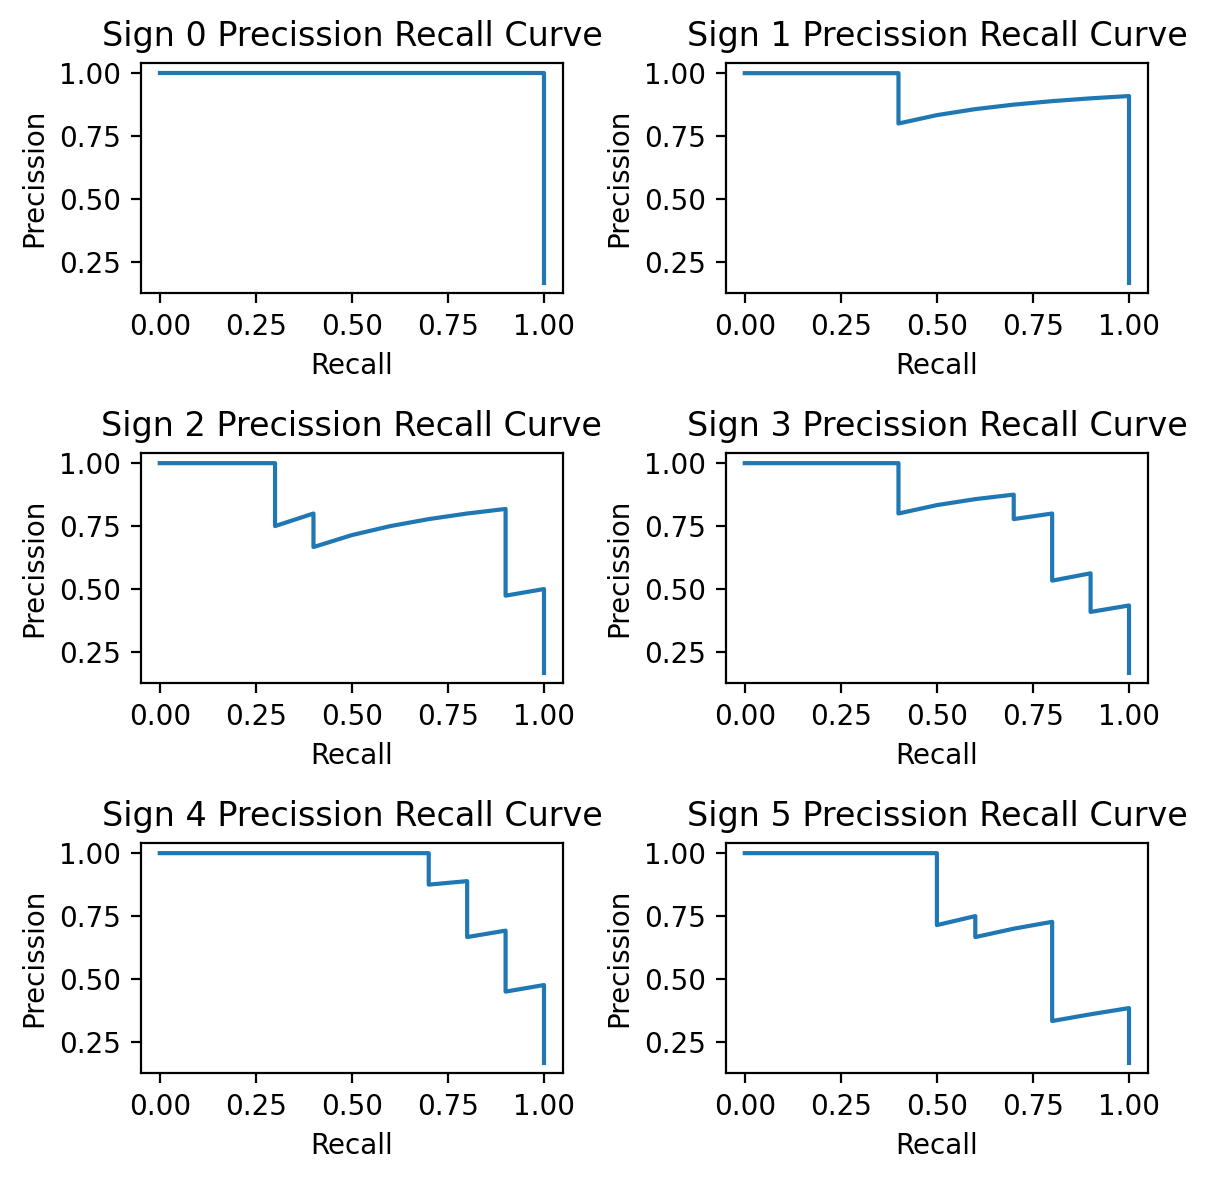

In [129]:
# Plotting Precision Recall Curve
precision, recall = precission_recall_lists(pred_val, labels_onehot)
plot_precission_recall(precision, recall, "HSC/model_10%_pr.png")

**Precision-Recall Curves:**
 - Signs 0 and 1 shows near-perfect precision across all recall values, indicating excellent performance.
 - Sign 4 show high precision at low recall, with some drop-off at higher recall values.
 - Signs 2, 3 and 5 shows the most variability, with precision fluctuating as recall increases.

In [130]:
# Creating function for ploting ROC curve
def fpr_tpr_lists(pred: np.ndarray, labels: np.ndarray) -> tuple:
    fpr = {}
    tpr = {}

    for i in range(6):
        y_pred = pred[:, i]
        y_true = labels_onehot[:, i]
        f, t, _ = roc_curve(y_true, y_pred)
        fpr[i] = f
        tpr[i] = t
    return fpr, tpr

In [131]:
def plot_roc(fpr: dict, tpr: dict, img_name: str):
    fig, ax = plt.subplots(3, 2)
    fig.set_size_inches(6, 6)
    fig.set_dpi(200)
    for i in range(6):
        m, n = divmod(i, 2)
        ax[m, n].plot(fpr[i], tpr[i], label=f"Sign {i}")
        ax[m, n].set_title(f"Sign {i} ROC Curve")
        ax[m, n].set_xlabel("False Positive Rate")
        ax[m, n].set_ylabel("True Positive Rate")
    plt.tight_layout()
    plt.savefig(img_name, dpi=250)

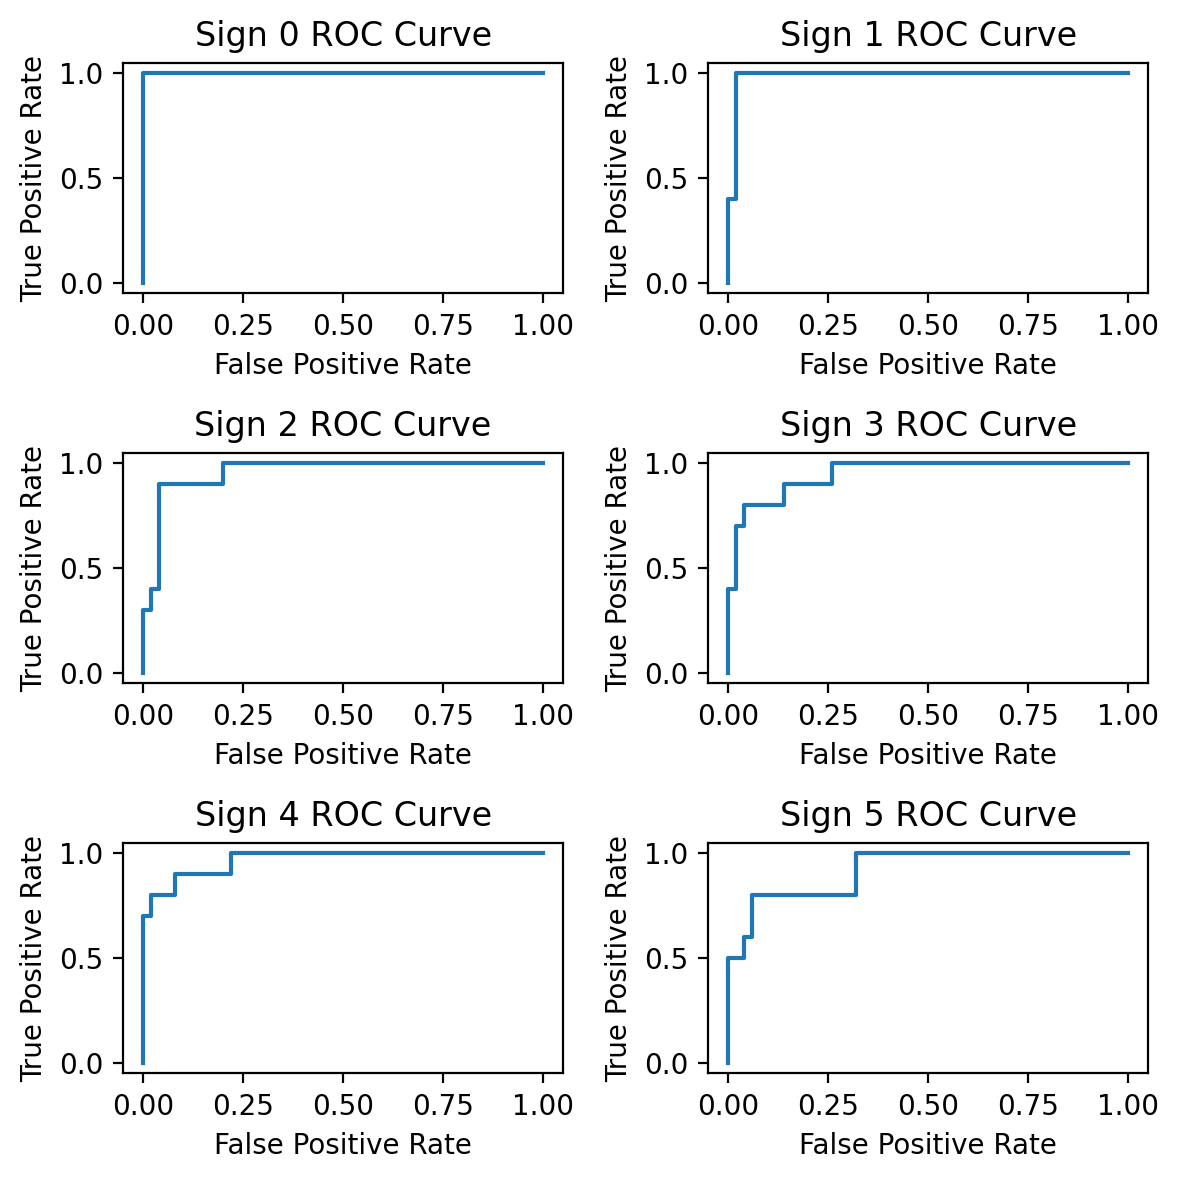

In [132]:
# Plotting ROC Curve
fpr, tpr = fpr_tpr_lists(pred_val, labels_onehot)
plot_roc(fpr, tpr, "HSC/model_10%_roc.png")

**ROC Curves:**
 - Signs 0 and 1 show near-perfect ROC curves, indicating excellent discrimination.
 - Signs 2 and 4 have very good ROC curves, with high true positive rates and low false positive rates.
 - Signs 3 and 5 show good performance but have slightly lower AUC compared to the others.

In [133]:
# Storing metrics to upload in mlflow server
run_metrics = {
    "val_loss": val_loss,
    "val_sparse_categorical_accuracy": val_sparse_categorical_accuracy,
    "sign_0_precission": sign_0_precission, "sign_0_recall": sign_0_recall, "sign_0_f1": sign_0_f1, "sign_1_precission": sign_1_precission,
    "sign_1_recall": sign_1_recall, "sign_1_f1": sign_1_f1, "sign_2_precission": sign_2_precission, "sign_2_recall": sign_2_recall,
    "sign_2_f1": sign_2_f1, "sign_3_precission": sign_3_precission, "sign_3_recall": sign_3_recall, "sign_3_f1": sign_3_f1,
    "sign_4_precission": sign_4_precission, "sign_4_recall": sign_4_recall, "sign_4_f1": sign_4_f1, "sign_5_precission": sign_5_precission,
    "sign_5_recall": sign_5_recall, "sign_5_f1": sign_5_f1, "auc_score": auc_score}

In [36]:
# Login to dagshub
!dagshub login

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



                      ❗❗❗ AUTHORIZATION REQUIRED ❗❗❗                      


Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=5de119f5-9c55-40a1-b44d-9bfae4d26dbc&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=8e98939ad4dea0fa7503685690775efcd19e870742e6214d59fa81a61a30e8d7


⠏ Waiting for authorizationon
✅ OAuth token added


In [37]:
# Importing secrets
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
tracking_uri = user_secrets.get_secret("MLFLOW_TRACKING_URI")
repo_name_ = user_secrets.get_secret("REPO_NAME")
repo_owner_ = user_secrets.get_secret("REPO_OWNER")

# Creating function to log experiments to mlflow
def create_experiment(experiment_name: str,run_name: str, run_metrics: dict, model, model_name: str = None, la_path: str = None, confusion_matrix_path: str = None,
                      precission_recall_path: str = None, roc_path: str = None, run_params = None):

    try:
        dagshub.init(repo_owner=f"{repo_owner_}", repo_name=f"{repo_name_}", mlflow=True)
        
        # You can get your MLlfow tracking uri from your dagshub repo by opening "Remote" dropdown menu, go to "Experiments" tab and copy the MLflow experiment tracking uri and paste below
        mlflow.set_tracking_uri(f"{tracking_uri}")
        
        mlflow.set_experiment(experiment_name)
        
        with mlflow.start_run(run_name=run_name):
            
            if not run_params == None:
                for param in run_params:
                    mlflow.log_param(param, run_params[param])
            
            for metric, value in run_metrics.items():
                if isinstance(value, list):
                    # If the metric is a list, log each value as a separate step
                    for step, v in enumerate(value):
                        mlflow.log_metric(metric, v, step=step)
                else:
                    # If it's a single value, log it normally
                    mlflow.log_metric(metric, value)

            tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

            artifact_paths = {
                'loss_accuracy': la_path,
                'confusion_matrix': confusion_matrix_path,
                'precision_recall_curve': precission_recall_path,
                'roc_curve': roc_path
            }

            for artifact_name, path in artifact_paths.items():
                if path and os.path.exists(path):
                    if tracking_url_type_store != "file":
                        mlflow.log_artifact(path, artifact_name)
                elif path:
                    print(f"Warning: Artifact file not found: {path}")

            if tracking_url_type_store != "file":
#                 # savin the `model`
#                 model.save(model_name)
#                 # log saved `model`
#                 mlflow.tensorflow.log_model(tf.keras.models.load_model(model_name), "model")
                
                # Create a temporary directory
                with tempfile.TemporaryDirectory() as tmp_dir:
                    # Export the model to SavedModel format
                    if model_name is None:
                        save_path = os.path.join(tmp_dir, "keras_model.keras")
                        model.export(save_path)
                    else:
                        save_path = os.path.join(tmp_dir, f"{model_name}.keras")
                        model.export(save_path)

                    # Log the saved model
#                     mlflow.tensorflow.log_model(tf.saved_model.load(save_path), "model")
                    mlflow.keras.log_model(model, "model")

            mlflow.set_tags({"tag1":"Transfer Learning", "tag2":"Image Classification"})

        print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        import traceback
        traceback.print_exc()

In [134]:
from datetime import datetime
experiment_name = "handsign_transfer_learning_"+"10%"
run_name = "run_10%_"+str(datetime.now().strftime("%d-%m-%y_%H:%M:%S"))
create_experiment(experiment_name, run_name, run_metrics, model=model, model_name="model.keras",
                  la_path='HSC/model_10%_la.png', confusion_matrix_path='HSC/model_10%_val_cmd.png', 
                  precission_recall_path='HSC/model_10%_pr.png', roc_path='HSC/model_10%_roc.png')

Initialized MLflow to track repo "pranay.makxenia/ML_Projects"

Repository pranay.makxenia/ML_Projects initialized!

Saved artifact at '/tmp/tmpu4ec9i4x/model.keras.keras'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  133346888695328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346886926576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346886928336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346886929744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346886931328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133347010437264: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  133347008929936: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  133347010098128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133347009003936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133347009011856: TensorSpec(shape=(), dtype=tf.re

2024/07/04 13:38:33 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/07/04 13:38:40 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpt77t4ay_/model, flavor: keras). Fall back to return ['keras==3.3.3']. Set logging level to DEBUG to see the full traceback. 


Run - run_10%_04-07-24_13:38:13 is logged to Experiment - handsign_transfer_learning_10%


#### Creating Testing Functions

In [39]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor
    and reshapes it to (img_shape, img_shape, colour_channel).
    """
    # Read in target file (an image)
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor & ensure 3 colour channels
    # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
    img = tf.image.decode_image(img, channels=3)

    # Resize the image (to the same size our model was trained on)
    img = tf.image.resize(img, size = [img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img_ = img/255.
    return img, img_

In [40]:
def pred_and_plot(model, filename, class_names):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img_tf, img_plt  = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img_tf, axis=0))

    # Get the predicted class
    if len(pred[0]) > 1: # check for multi-class
        pred_class = class_names[pred.argmax()] # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

    # Plot the image and predicted class
    plt.imshow(img_plt)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

In [41]:
assets_path = "ML_Projects-main/Hand_Signs_Classification/assets"

Making predictions with `model`

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


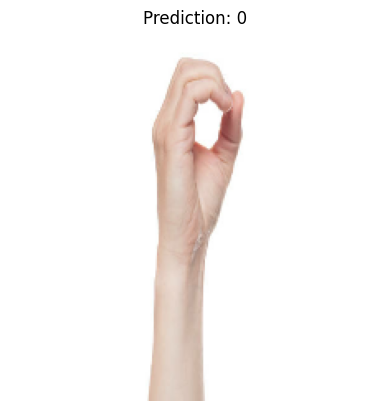

In [108]:
pred_and_plot(model, f"{assets_path}/hs-0.jpg", classes_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


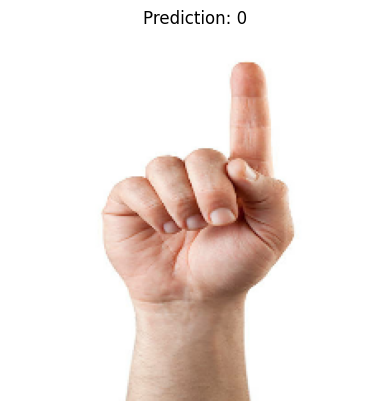

In [109]:
pred_and_plot(model, f"{assets_path}/hs-1.jpg", classes_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


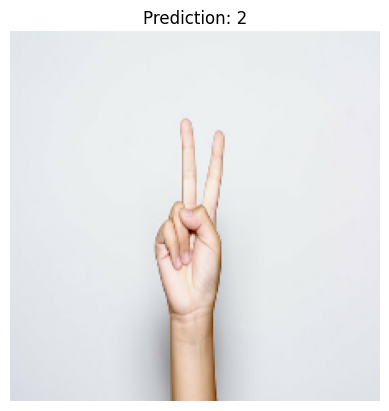

In [110]:
pred_and_plot(model, f"{assets_path}/hs-2.jpg", classes_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


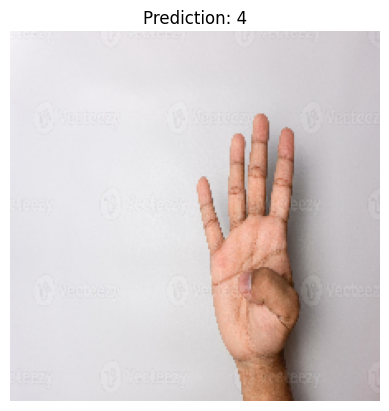

In [114]:
pred_and_plot(model, f"{assets_path}/hs-4.jpg", classes_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


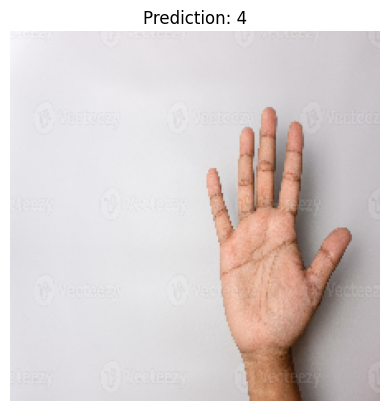

In [112]:
pred_and_plot(model, f"{assets_path}/hs-5.jpg", classes_test)

So the `model` correctly classsified 0, 1 & 5 but missed on 2 & 3.

## `model` Feature Extraction Transfer Learning Conclusion

Based on the analysis, the model's performance can be summarized as follows:

*Strengths:*
 - Decent overall accuracy of 75.00% on the validation set, considering only 10% of training data was used.
 - Excellent performance on hand signs 0 and 1, with perfect recall and high precision.
 - Good overall discrimination ability, as indicated by the 85% AUC-ROC score.


*Areas for improvement:*
 - Inconsistent performance across different hand signs, with signs 3-5 showing lower and varied precision and recall.
 - High validation loss (108%) that needs investigation, as it seems unusually high and may indicate issues with loss calculation or model setup.
 - Some confusion between signs 1, 2, 3, 4, and 5, as evident from the confusion matrix.


*Overall assessment:*
The model shows promise, especially considering it was trained on only 10% of the data. It performs very well on two classes but struggles with consistently distinguishing between the others. The high validation loss is concerning and should be addressed.

Overall, this transfer learning model using EfficientNetB0 shows promise for hand sign classification, but fine-tuning and possibly more diverse training data could help address the identified weaknesses and improve overall performance.

So let's begin with next-in-line step 2...

# ***Step2: Fine-Tuning Base `model` on 10% Training Data***

## `model` Compiling & Training

Let's start by checking our `model` layers and which of them are trainable...

In [135]:
for layer in model.layers:
    print(f"{layer} >> Trainable: {layer.trainable}")

<InputLayer name=input_layer, built=True> >> Trainable: True
<Sequential name=data_augmentation, built=True> >> Trainable: True
<Functional name=efficientnetb0, built=True> >> Trainable: False
<GlobalAveragePooling2D name=global_avg_pooling_layer, built=True> >> Trainable: True
<Dense name=output_layer, built=True> >> Trainable: True


So we can see that almost all the layers are trainable except `efficientnetb0` layer, which is the base model for our `model`. This means that the our base layer isn't learning anything from our dataset because their layers are frozen. So now I'll make top 10 layers (you can choose less, which is recommended) of the base model trainable by unfreezing them.

In [136]:
# Unfreeze top 10 layers of EfficientNetB0 model
base_model_layer = model.layers[2]

# Unfreezing all layers
base_model_layer.trainable = True

# Re-freezing all layers except top 10 layers
for layer in base_model_layer.layers[:-10]:
    layer.trainable = False

In [137]:
# Checking trainable layers in base model
print(f"Trainable layers in base model: {len(base_model_layer.trainable_variables)}")

Trainable layers in base model: 10


Now let's re-compile the `model`, but with reduced learning rate, and re-train on 10% data and re-evaluate.

In [138]:
# re-compiling `model`
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

This time I'll set an initial epoch as the last epoch of pervious model. We're going to continue training on from where our previous model finished. Since it trained for 5 epochs, our fine-tuning will begin on the epoch 5 and continue for another 5 epochs. So I'll set the epochs as 10.

In [139]:
tf.random.set_seed(42)
#Fitting model with 10% training data
hist_model_fine10_percent = model.fit(data_Xtrain[:int(0.25*len(data_Xtrain))],
                                      data_ytrain[:int(0.25*len(data_ytrain))],
                                      epochs=10,
                                      initial_epoch=hist_model10_percent.epoch[-1],
                                      validation_data=val_dataset,
                                      callbacks=[checkpoint_callback]
                                     )

Epoch 5/10


2024-07-04 13:39:48.710794: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_17_1/efficientnetb0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.9855 - sparse_categorical_accuracy: 0.6949
Epoch 5: val_sparse_categorical_accuracy improved from 0.75000 to 0.76667, saving model to model_checkpoints_weights/checkpoint.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 595ms/step - loss: 0.9833 - sparse_categorical_accuracy: 0.6943 - val_loss: 1.0123 - val_sparse_categorical_accuracy: 0.7667
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.8475 - sparse_categorical_accuracy: 0.7851
Epoch 6: val_sparse_categorical_accuracy improved from 0.76667 to 0.80000, saving model to model_checkpoints_weights/checkpoint.weights.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - loss: 0.8458 - sparse_categorical_accuracy: 0.7862 - val_loss: 0.9242 - val_sparse_categorical_accuracy: 0.8000
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.7649 - sparse_categorical_accuracy: 0.8058
Epoch 7: val_sparse_categorical_accuracy improved from 0.80000 to 0.83333, saving model to model_checkpoints_weights/

## Evaluating Fine-Tuned `model`

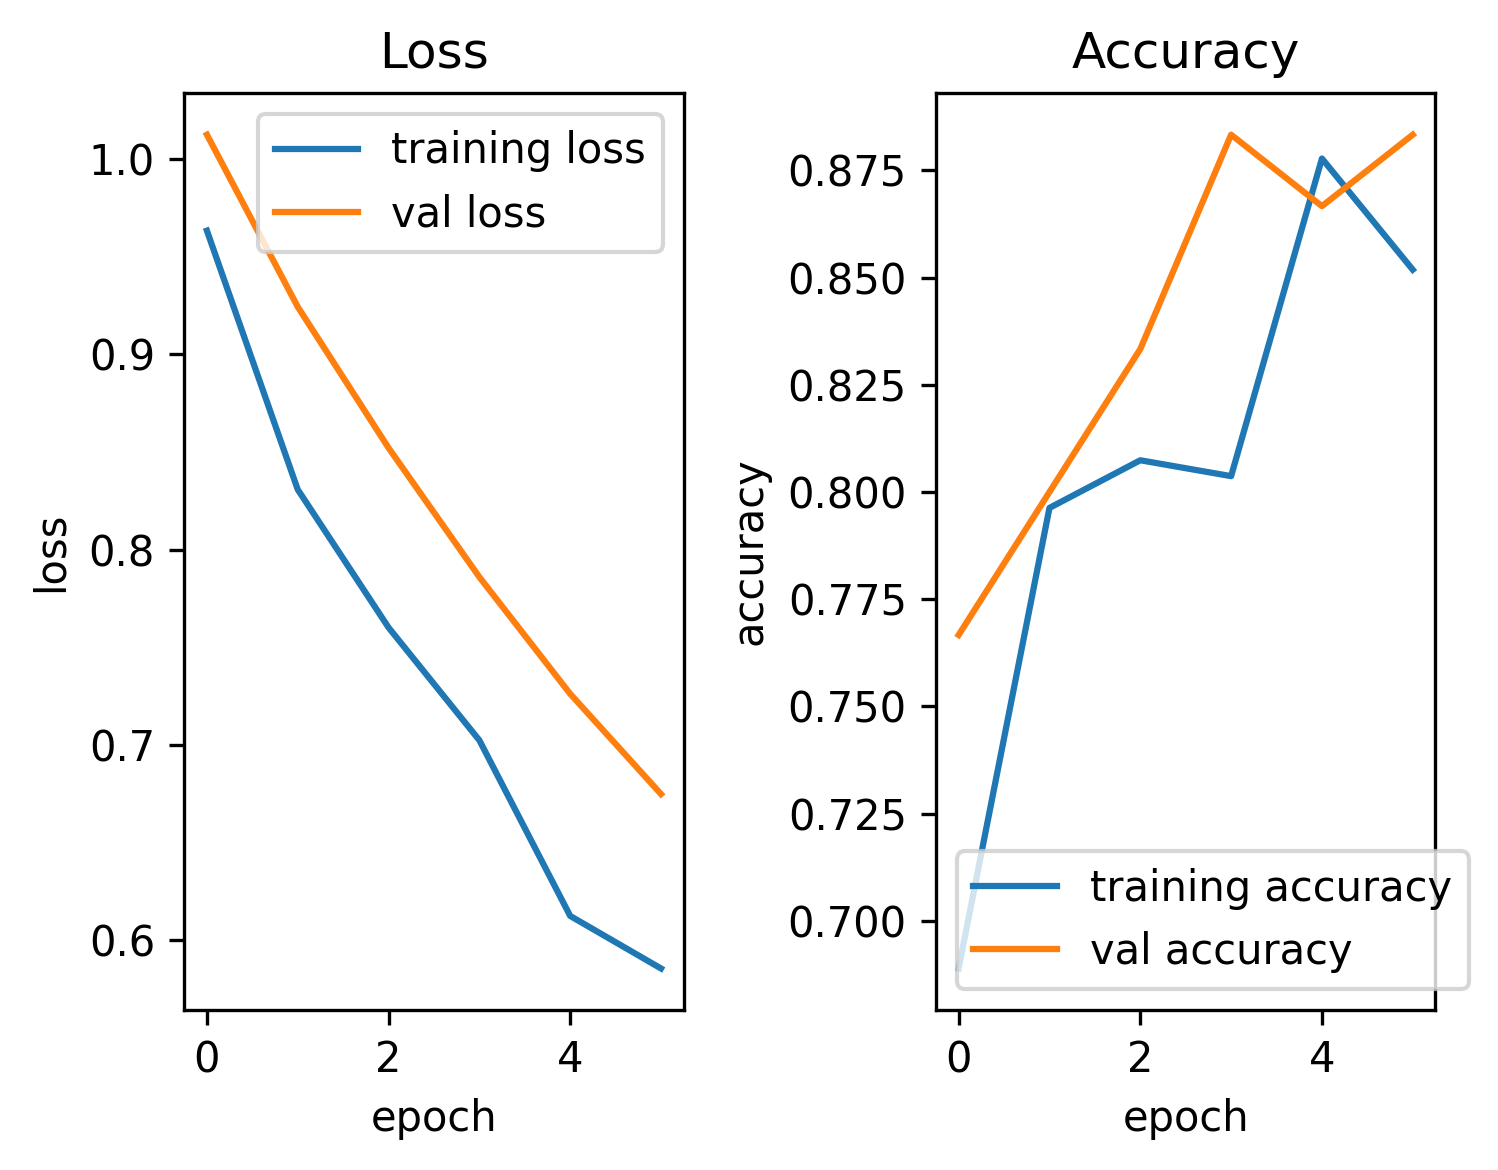

In [148]:
# Plotting Loss & Accuracy Curves
plot_curves(hist_model_fine10_percent, img_name="HSC/model_fine10%_la.png")

**Loss and Accuracy Plot:**
 - Training loss decreases steadily over epochs, while validation loss generally decreases but is slightly higher.
 - Both training and validation accuracy increase over time, with validation accuracy slightly higher than training accuracy by the final epoch.
 - No clear signs of overfitting, as validation metrics closely follow training metrics.

In [149]:
for key, value in model.evaluate(val_dataset, return_dict=True).items():
    print(f"Validation set {key}: {value*100:.2f}%")

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6370 - sparse_categorical_accuracy: 0.9010
Validation set loss: 67.49%
Validation set sparse_categorical_accuracy: 88.33%


Validation loss of 67.49% seems high and may need investigation.

Validation accuracy of 88.33% indicates good overall performance.

In [150]:
# Saving val_loss & val_sparse_categorical_accuracy for future reference
val_loss, val_sparse_categorical_accuracy = hist_model_fine10_percent.history["val_loss"], hist_model_fine10_percent.history["val_sparse_categorical_accuracy"]

In [151]:
# Making predictions
pred_val2 = model.predict(X_val, batch_size=1)

60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [152]:
print(f"Validation set Categorical Accuracy: {tf.keras.metrics.categorical_accuracy(y_val, tf.argmax(pred_val2, axis=1).numpy()).numpy()}")

Validation set Categorical Accuracy: 1.0


A score of 1.0 means that the model has correctly classified every single sample in the validation set, with no errors or misclassifications.

In [153]:
# Evaluating Precission
precission_vals = []
print("Validation set Precission")
for j in range(6):
    val_precision = tf.keras.metrics.Precision(class_id=j)
    i = np.round(val_precision(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred_val2), axis=1).numpy(), depth=6)).numpy()*100, 2)
    precission_vals.append(i)
    print(f"\tsign_{j}_precission: {i}%")
sign_0_precission, sign_1_precission, sign_2_precission, sign_3_precission, sign_4_precission, sign_5_precission = precission_vals

Validation set Precission
	sign_0_precission: 100.0%
	sign_1_precission: 100.0%
	sign_2_precission: 71.43%
	sign_3_precission: 90.0%
	sign_4_precission: 83.33%
	sign_5_precission: 100.0%


In [154]:
# Evaluating Recall
recall_vals = []
print("Validation set Recall")
for j in range(6):
    val_recall = tf.keras.metrics.Recall(class_id=j)
    i = np.round(val_recall(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred_val2), axis=1).numpy(), depth=6)).numpy()*100, 2)
    recall_vals.append(i)
    print(f"\tsign_{j}_recall: {i}%")
sign_0_recall, sign_1_recall, sign_2_recall, sign_3_recall, sign_4_recall, sign_5_recall = recall_vals

Validation set Recall
	sign_0_recall: 100.0%
	sign_1_recall: 90.0%
	sign_2_recall: 100.0%
	sign_3_recall: 90.0%
	sign_4_recall: 100.0%
	sign_5_recall: 50.0%


In [155]:
# Evaluating Validation set F1 score
val_f1_score = tf.keras.metrics.F1Score()
scores = np.round(val_f1_score(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred_val2), axis=1).numpy(), depth=6)).numpy()*100, 2)
sign_0_f1, sign_1_f1, sign_2_f1, sign_3_f1, sign_4_f1, sign_5_f1 = scores

print("Validation set F1Scores:")
for i, j in enumerate(scores):
    print(f"\tHand sign_{i}_f1: {j:.2f}%")

Validation set F1Scores:
	Hand sign_0_f1: 100.00%
	Hand sign_1_f1: 94.74%
	Hand sign_2_f1: 83.33%
	Hand sign_3_f1: 90.00%
	Hand sign_4_f1: 90.91%
	Hand sign_5_f1: 66.67%


In [156]:
# Evaluating Validation set AUC score
val_auc = tf.keras.metrics.AUC()
val_auc.update_state(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred_val2), axis=1).numpy(), depth=6))
auc_score = np.round(val_auc.result().numpy()*100, 2)
print(f"Validation set AUC-ROC score: {(val_auc.result().numpy()*100):.2f}%")

Validation set AUC-ROC score: 93.00%


A score of 93.00% indicates that the model is able to correctly classify positive and negative samples with a high degree of accuracy.

In [157]:
# Validation set Classification report
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
target_names = ['hand sign 0', 'hand sign 1', 'hand sign 2', 'hand sign 3', 'hand sign 4', 'hand sign 5']
print(f"Validation set Classification Report:\n{classification_report(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred_val2), axis=1).numpy(), depth=6), target_names=target_names)}")

Validation set Classification Report:
              precision    recall  f1-score   support

 hand sign 0       1.00      1.00      1.00        10
 hand sign 1       1.00      0.90      0.95        10
 hand sign 2       0.71      1.00      0.83        10
 hand sign 3       0.90      0.90      0.90        10
 hand sign 4       0.83      1.00      0.91        10
 hand sign 5       1.00      0.50      0.67        10

   micro avg       0.88      0.88      0.88        60
   macro avg       0.91      0.88      0.88        60
weighted avg       0.91      0.88      0.88        60
 samples avg       0.88      0.88      0.88        60



**Classification Report:**

Here is a detailed comment on the classification report:

 1. Hand sign 0:
  - Perfect precision, recall, and F1-score (1.00), indicating flawless performance. 
  - The model is able to correctly classify all hand sign 0 images with no false positives or false negatives.


 2. Hand sign 1:
  - Perfect precision, but slightly lower recall (0.90), indicating a small number of false negatives.
  - The F1-score of 0.95 is still very high, suggesting excellent performance.


 3. Hand sign 2:
  - Perfect recall (1.00) but lower precision (0.71), indicating some false positives. The model is able to detect all hand sign 2 images, but also misclassifies some non-hand sign 2 images as hand sign 2. 
  - The F1-score of 0.83 shows good performance with room for improvement in precision.


 4. Hand sign 3:
  - High precision (0.90) and recall (0.90), indicating strong performance with few false positives and false negatives. 
  - The F1-score of 0.90 is very high, suggesting excellent performance.


 5. Hand sign 4:
  - High precision (0.83) and perfect recall (1.00), indicating strong performance with few false positives and no false negatives. 
  - The F1-score of 0.91 is very high, suggesting excellent performance.


 6. Hand sign 5:
  - Perfect precision, but lower recall (0.50), indicating a significant number of false negatives. 
  - The F1-score of 0.67 is lower than the other hand signs, suggesting room for improvement, particularly in recall.

Overall, the model performs well on most hand signs, with high precision, recall, and F1-scores. However, there is room for improvement on hand sign 2 (precision) and hand sign 5 (recall).

Validation Set Confusion Matrix\n


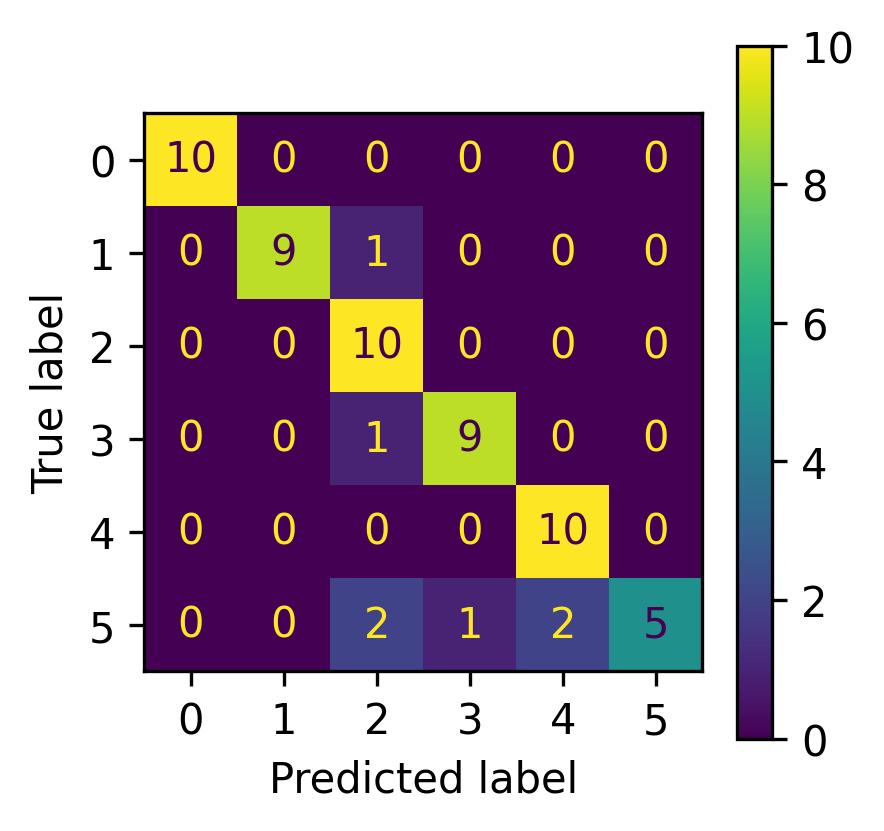

In [158]:
# Validation set Confusion Matrix
print('Validation Set Confusion Matrix\\n')
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
val_cmd = ConfusionMatrixDisplay(confusion_matrix(y_val, tf.argmax(pred_val2, axis=1).numpy()), display_labels=classes_train)
val_cmd.plot(ax=ax);

**Confusion Matrix:**
 - Signs 0, 2, and 4 have perfect classification (10/10 correct).
 - Sign 1 shows some confusion with Sing 2.
 - Sign 3 shows some confusion with Sign 2.
 - Sign 5 has many misclasdifications as Signs 2(2), 3(1), and 4(2).

In [159]:
# Saving Matrix
val_cmd.figure_.savefig('HSC/model_fine10%_val_cmd.png')

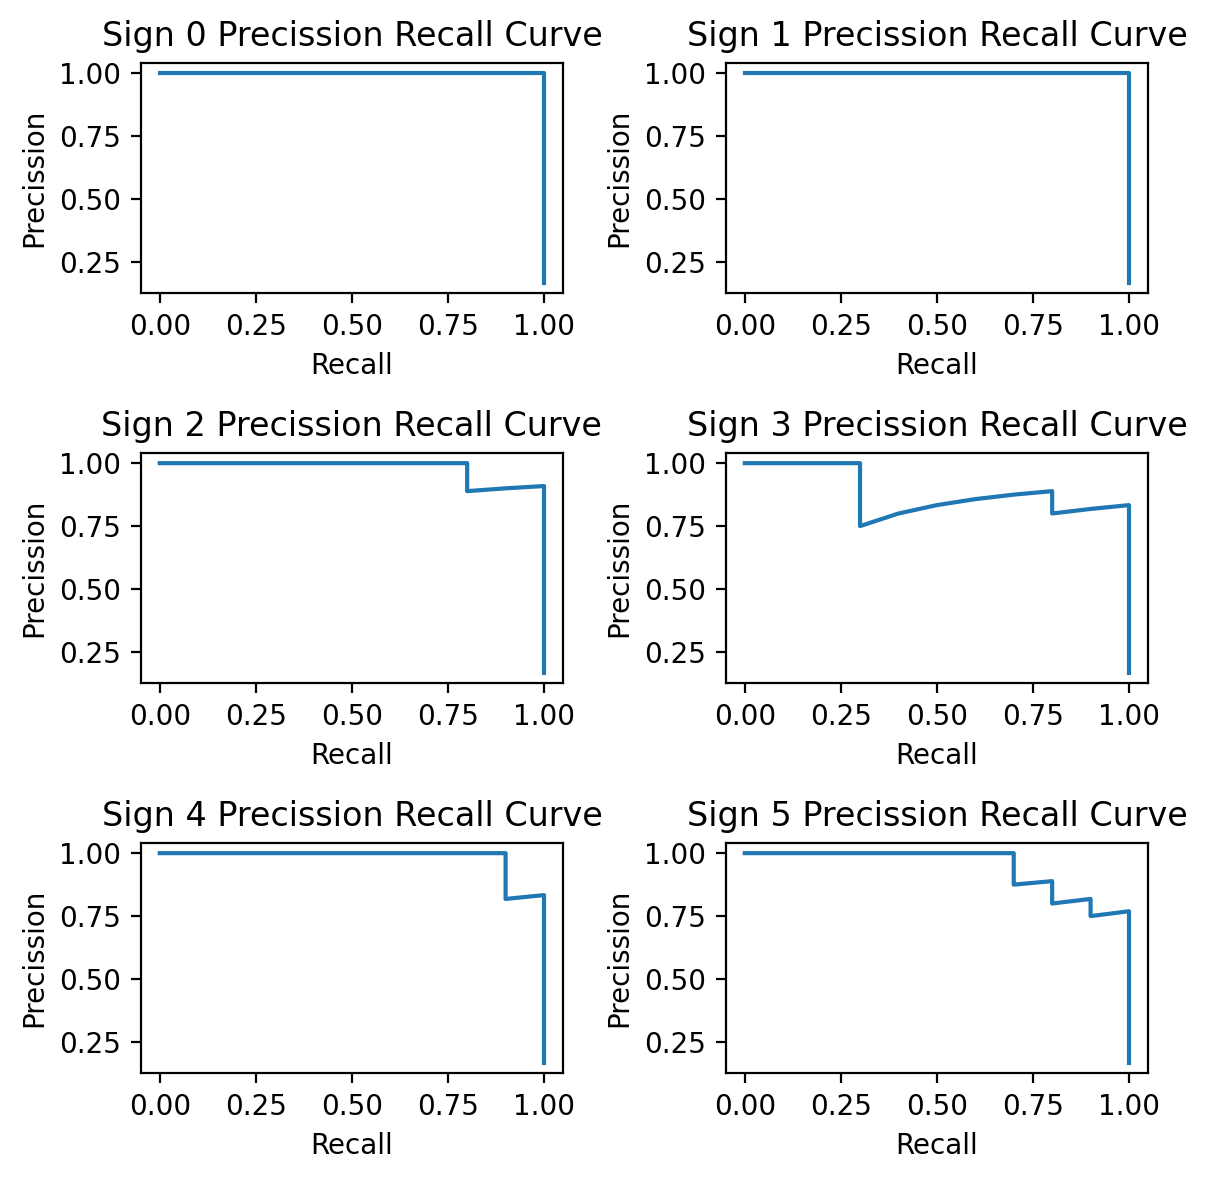

In [160]:
# Plotting Precision Recall Curve
precision, recall = precission_recall_lists(pred_val2, labels_onehot)
plot_precission_recall(precision, recall, "HSC/model_fine10%_pr.png")

**Precision-Recall Curves:**
 - Sign 0 and 1 show perfect precision across all recall values, indicating excellent performance.
 - Signs 2, 4, and 5 maintain high precision for most recall values, with some drop at very high recall.
 - Sign 3 shows the most variability, with precision fluctuating as recall increases.

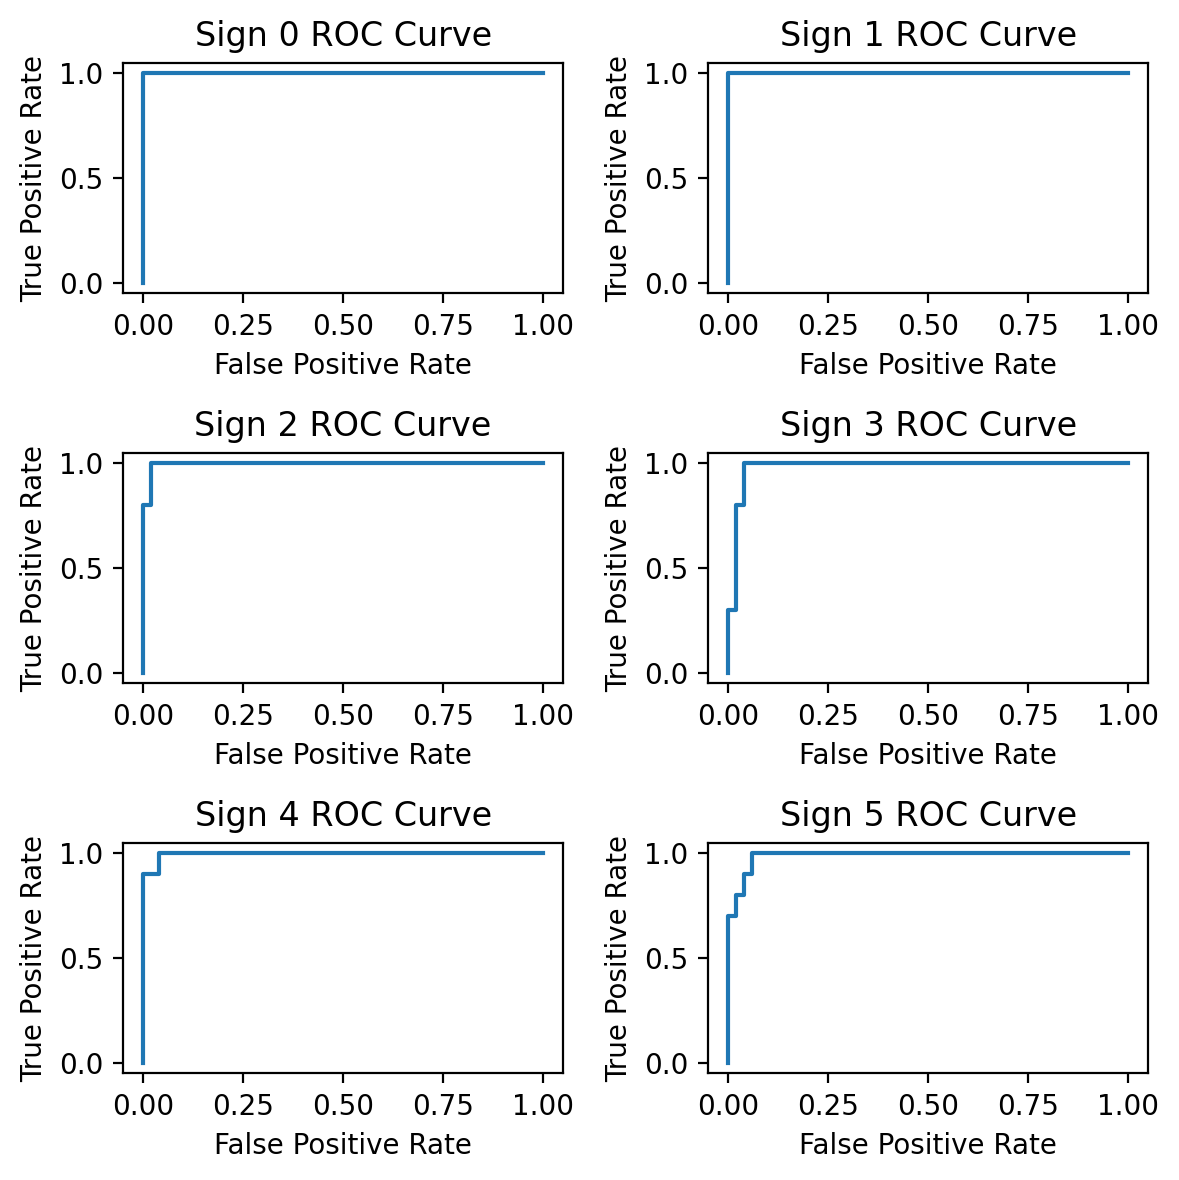

In [161]:
# Plotting ROC Curve
fpr, tpr = fpr_tpr_lists(pred_val2, labels_onehot)
plot_roc(fpr, tpr, "HSC/model_fine10%_roc.png")

**ROC Curves:**
 - Signs 0, 1, and 2 show near-perfect ROC curves, indicating excellent discrimination.
 - Signs 3, 4, and 5 have very good ROC curves, with high true positive rates and low false positive rates.
 - All signs show AUC close to 1, suggesting strong overall classification performance.

In [162]:
# Storing metrics to upload in mlflow server
run_metrics = {
    "val_loss": val_loss,
    "val_sparse_categorical_accuracy": val_sparse_categorical_accuracy,
    "sign_0_precission": sign_0_precission, "sign_0_recall": sign_0_recall, "sign_0_f1": sign_0_f1, "sign_1_precission": sign_1_precission,
    "sign_1_recall": sign_1_recall, "sign_1_f1": sign_1_f1, "sign_2_precission": sign_2_precission, "sign_2_recall": sign_2_recall,
    "sign_2_f1": sign_2_f1, "sign_3_precission": sign_3_precission, "sign_3_recall": sign_3_recall, "sign_3_f1": sign_3_f1,
    "sign_4_precission": sign_4_precission, "sign_4_recall": sign_4_recall, "sign_4_f1": sign_4_f1, "sign_5_precission": sign_5_precission,
    "sign_5_recall": sign_5_recall, "sign_5_f1": sign_5_f1, "auc_score": auc_score}

In [163]:
experiment_name = "handsign_transfer_learning_fine"+"10%"
run_name = "run_fine10%_"+str(datetime.now().strftime("%d-%m-%y_%H:%M:%S"))
create_experiment(experiment_name, run_name, run_metrics, model=model, model_name="model2.keras",
                  la_path='HSC/model_fine10%_la.png', confusion_matrix_path='HSC/model_fine10%_val_cmd.png', 
                  precission_recall_path='HSC/model_fine10%_pr.png', roc_path='HSC/model_fine10%_roc.png')

Initialized MLflow to track repo "pranay.makxenia/ML_Projects"

Repository pranay.makxenia/ML_Projects initialized!

Saved artifact at '/tmp/tmp00e6p2vh/model2.keras.keras'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  133346888695328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346886926576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346886928336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346886929744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346886931328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133347010437264: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  133347008929936: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  133347010098128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133347009003936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133347009011856: TensorSpec(shape=(), dtype=tf.r

2024/07/04 13:44:07 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/07/04 13:44:13 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpj9gjes96/model, flavor: keras). Fall back to return ['keras==3.3.3']. Set logging level to DEBUG to see the full traceback. 


Run - run_fine10%_04-07-24_13:43:47 is logged to Experiment - handsign_transfer_learning_fine10%


Now making predictions with fine-tuned `model`

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


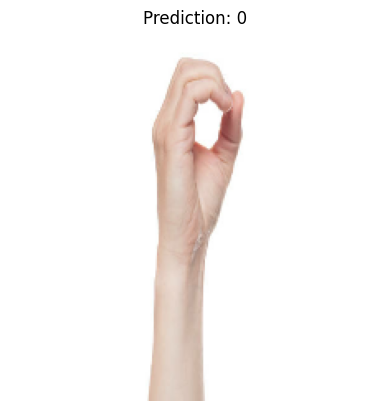

In [140]:
pred_and_plot(model, f"{assets_path}/hs-0.jpg", classes_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


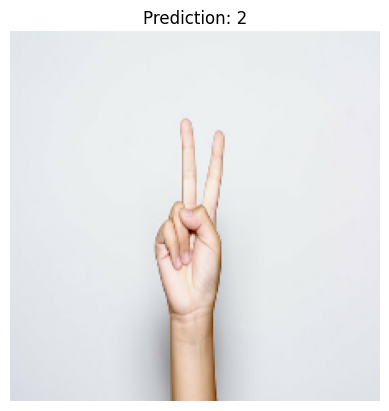

In [142]:
pred_and_plot(model, f"{assets_path}/hs-2.jpg", classes_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


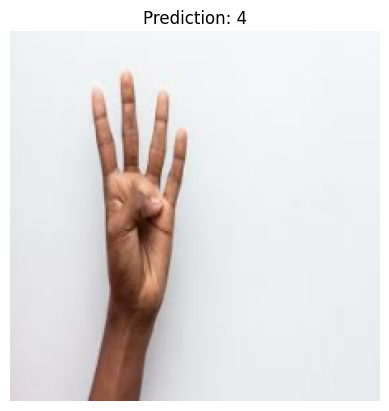

In [146]:
pred_and_plot(model, f"{assets_path}/hs-41.jpeg", classes_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


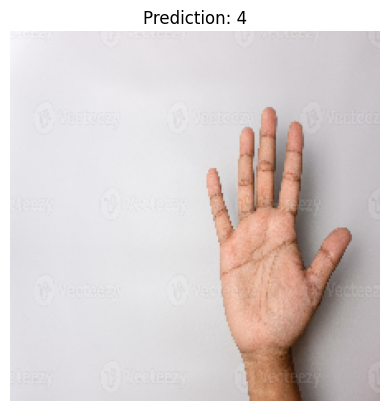

In [147]:
pred_and_plot(model, f"{assets_path}/hs-5.jpg", classes_test)

## `model` Fine-Tuning Transfer Learning Conclusion

The model demonstrates satisfactory performance across all hand signs, especially considering it was trained on only 10% of the available data.

*Strengths:*
 - High overall accuracy of 88.33% on the validation set, especially considering only 10% of training data was used.
 - Very good overall discrimination ability, as indicated by the 93% AUC-ROC score.
 - Excellent performance on hand signs 0 and 1, with perfect precision, recall, and F1-scores.

*Areas for improvement:*
 - Inconsistent performance across different hand signs, with sign 5 showing lower recall.
 - Some confusion between signs 1 and 3.
 - Relatively high validation loss (67.49%) that needs investigation, as it seems inconsistent with the high accuracy.

*Overall assessment:*
 - The model demonstrates strong performance, particularly impressive given it was trained on only 10% of the data. It achieves perfect results for two classes and very good results for three others, with sign 5 being the main area for improvement. The high validation accuracy (88.33%) and AUC-ROC score (93%) indicate excellent overall classification ability.
 - The discrepancy between the high accuracy and the relatively high loss suggests that while the model is making correct classifications most of the time, it may not always be doing so with high confidence. This could be an area for further optimization.


In summary, this transfer learning model using EfficientNetB0 shows excellent potential for hand sign classification. Fine-tuning focused on improving the performance of sign 3, and possibly using more diverse training data, could help address the identified weaknesses and further improve the already strong overall performance.

# ***Step3: Finally Training Fine-Tuned Base `model` on 100% Training Data***

## Finally Re-Training `model` on 100% Training Data

In [164]:
checkpoint_path_fine = "model_fine_checkpoints_weights/checkpoint.weights.h5" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback_fine = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path_fine,
                                                         monitor="val_sparse_categorical_accuracy",
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [165]:
# Fitting model with 100% training data
hist_model_fine = model.fit(data_Xtrain,
                            data_ytrain,
                            epochs=5,
                            validation_data=val_dataset,
                            callbacks=[checkpoint_callback_fine]
                           )

Epoch 1/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.5729 - sparse_categorical_accuracy: 0.8547
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.98333, saving model to model_fine_checkpoints_weights/checkpoint.weights.h5
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - loss: 0.5720 - sparse_categorical_accuracy: 0.8550 - val_loss: 0.5052 - val_sparse_categorical_accuracy: 0.9833
Epoch 2/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.4335 - sparse_categorical_accuracy: 0.8967
Epoch 2: val_sparse_categorical_accuracy did not improve from 0.98333
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - loss: 0.4328 - sparse_categorical_accuracy: 0.8971 - val_loss: 0.4093 - val_sparse_categorical_accuracy: 0.9667
Epoch 3/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.3722 - sparse_categorical_accuracy: 0.9017
Epoch 3: val_sparse_categorical_accuracy did not improve from 0.98333
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - loss: 0.3716 - sparse_categorical_accuracy: 0.9020 - v

## Evaluating Final `model`

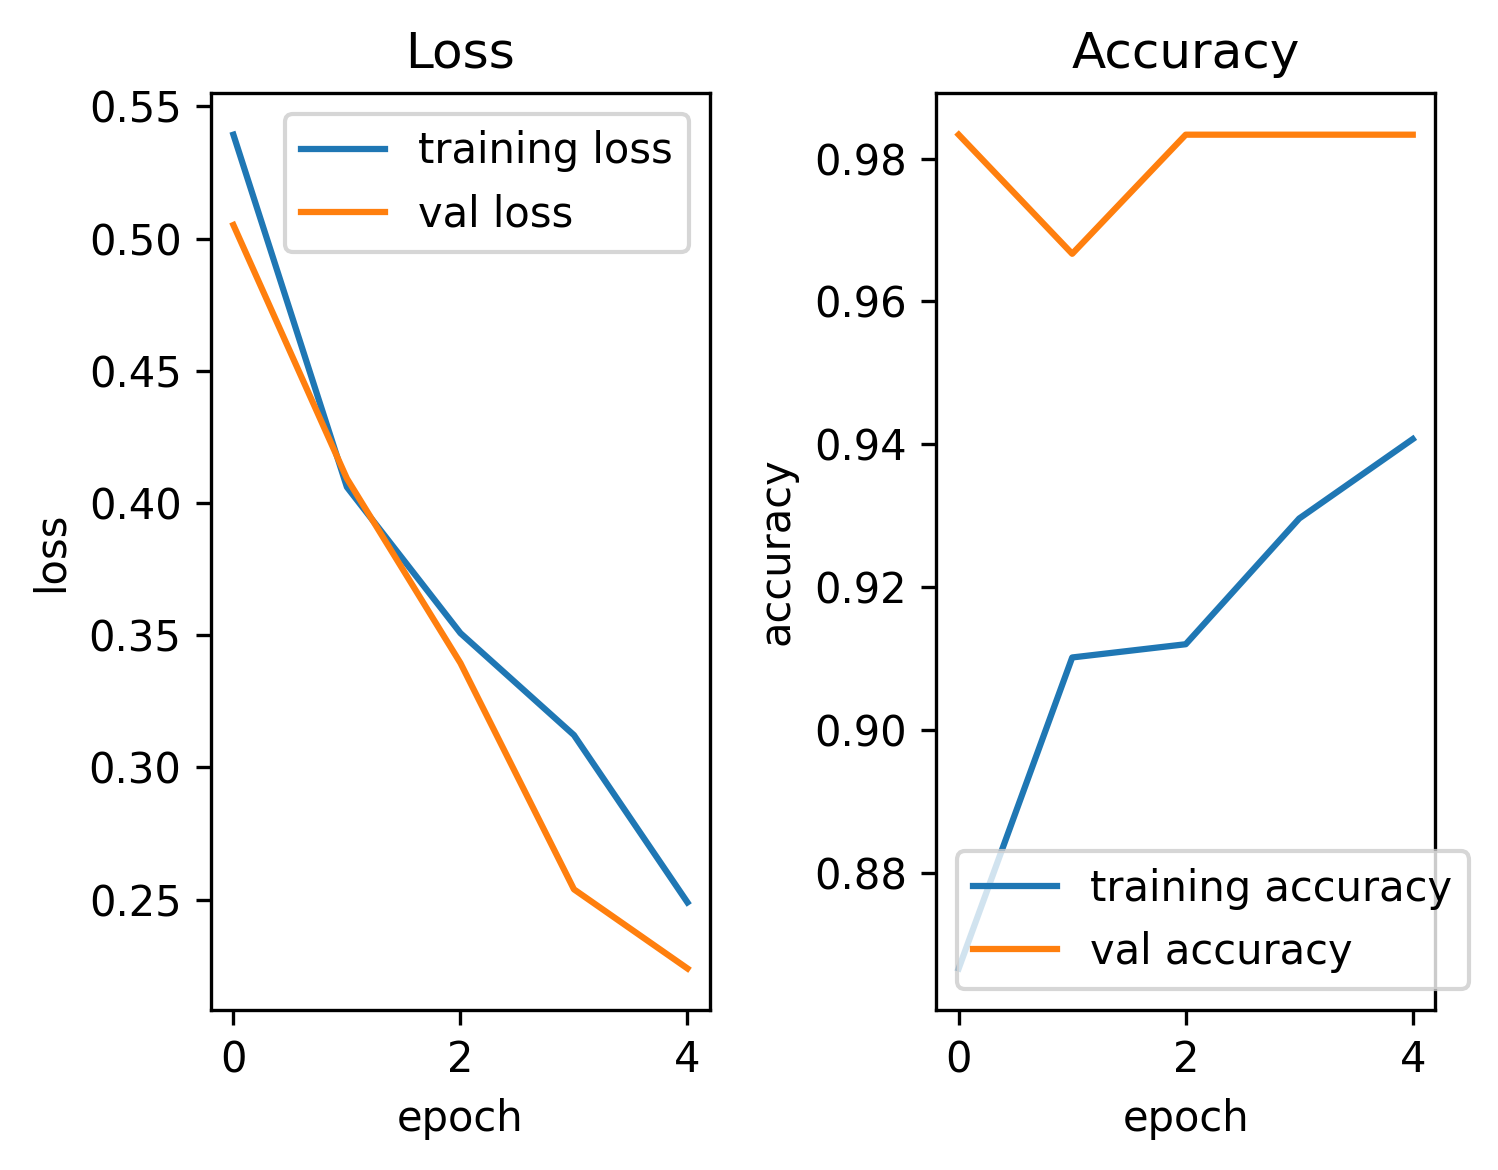

In [173]:
# Plotting Loss & Accuracy Curves
plot_curves(hist_model_fine, img_name="HSC/model_fine_la.png")

**Loss and Accuracy Plot:**
 - Both training and validation loss decrease steadily over epochs, with validation loss slightly lower.
 - Training and validation accuracy increase rapidly, with validation accuracy slightly outperforming training accuracy.
 - No signs of overfitting, as validation metrics closely follow or slightly exceed training metrics.

In [174]:
for key, value in model.evaluate(val_dataset, return_dict=True).items():
    print(f"Validation set {key}: {value*100:.2f}%")

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2098 - sparse_categorical_accuracy: 0.9655
Validation set loss: 22.40%
Validation set sparse_categorical_accuracy: 98.33%


Validation loss of 22.40% is good, especially considering the high accuracy.

Validation accuracy of 98.33% is excellent.

In [175]:
# Saving val_loss & val_sparse_categorical_accuracy for future reference
val_loss, val_sparse_categorical_accuracy = hist_model_fine.history["val_loss"], hist_model_fine.history["val_sparse_categorical_accuracy"]

In [176]:
# Making predictions
pred_val_fine = model.predict(X_val, batch_size=1)

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [177]:
print(f"Validation set Categorical Accuracy: {tf.keras.metrics.categorical_accuracy(y_val, tf.argmax(pred_val_fine, axis=1).numpy()).numpy()}")

Validation set Categorical Accuracy: 1.0


In [178]:
# Evaluating Precission
precission_vals = []
print("Validation set Precission")
for j in range(6):
    val_precision = tf.keras.metrics.Precision(class_id=j)
    i = np.round(val_precision(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred_val_fine), axis=1).numpy(), depth=6)).numpy()*100, 2)
    precission_vals.append(i)
    print(f"\tsign_{j}_precission: {i}%")
sign_0_precission, sign_1_precission, sign_2_precission, sign_3_precission, sign_4_precission, sign_5_precission = precission_vals

Validation set Precission
	sign_0_precission: 100.0%
	sign_1_precission: 100.0%
	sign_2_precission: 100.0%
	sign_3_precission: 90.91%
	sign_4_precission: 100.0%
	sign_5_precission: 100.0%


In [179]:
# Evaluating Recall
recall_vals = []
print("Validation set Recall")
for j in range(6):
    val_recall = tf.keras.metrics.Recall(class_id=j)
    i = np.round(val_recall(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred_val_fine), axis=1).numpy(), depth=6)).numpy()*100, 2)
    recall_vals.append(i)
    print(f"\tsign_{j}_recall: {i}%")
sign_0_recall, sign_1_recall, sign_2_recall, sign_3_recall, sign_4_recall, sign_5_recall = recall_vals

Validation set Recall
	sign_0_recall: 100.0%
	sign_1_recall: 100.0%
	sign_2_recall: 100.0%
	sign_3_recall: 100.0%
	sign_4_recall: 100.0%
	sign_5_recall: 90.0%


In [180]:
# Evaluating Validation set F1 score
val_f1_score = tf.keras.metrics.F1Score()
scores = np.round(val_f1_score(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred_val_fine), axis=1).numpy(), depth=6)).numpy()*100, 2)
sign_0_f1, sign_1_f1, sign_2_f1, sign_3_f1, sign_4_f1, sign_5_f1 = scores

print("Validation set F1Scores:")
for i, j in enumerate(scores):
    print(f"\tHand sign_{i}_f1: {j:.2f}%")

Validation set F1Scores:
	Hand sign_0_f1: 100.00%
	Hand sign_1_f1: 100.00%
	Hand sign_2_f1: 100.00%
	Hand sign_3_f1: 95.24%
	Hand sign_4_f1: 100.00%
	Hand sign_5_f1: 94.74%


In [181]:
# Evaluating Validation set AUC score
val_auc = tf.keras.metrics.AUC()
val_auc.update_state(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred_val_fine), axis=1).numpy(), depth=6))
auc_score = np.round(val_auc.result().numpy()*100, 2)
print(f"Validation set AUC-ROC score: {(val_auc.result().numpy()*100):.2f}%")

Validation set AUC-ROC score: 99.00%


AUC-ROC score of 99.00% indicates near-perfect discrimination ability.

In [182]:
# Validation set Classification report
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
target_names = ['hand sign 0', 'hand sign 1', 'hand sign 2', 'hand sign 3', 'hand sign 4', 'hand sign 5']
print(f"Validation set Classification Report:\n{classification_report(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred_val_fine), axis=1).numpy(), depth=6), target_names=target_names)}")

Validation set Classification Report:
              precision    recall  f1-score   support

 hand sign 0       1.00      1.00      1.00        10
 hand sign 1       1.00      1.00      1.00        10
 hand sign 2       1.00      1.00      1.00        10
 hand sign 3       0.91      1.00      0.95        10
 hand sign 4       1.00      1.00      1.00        10
 hand sign 5       1.00      0.90      0.95        10

   micro avg       0.98      0.98      0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60
 samples avg       0.98      0.98      0.98        60



**Classification Report:***

 1. Hand sign 0, 1, 2, and 4:

   - Perfect precision, recall, and F1-score (1.00) for all metrics.


 2. Hand sign 3:

   - Perfect recall (1.00) but slightly lower precision (0.91) due to one false positive.
   - Very high F1-score (0.95) shows excellent performance.


 3. Hand sign 5:

   - Perfect precision (1.00) but slightly lower recall (0.90) due to one false negative.
   - Very high F1-score (0.95) indicates excellent performance.

Validation Set Confusion Matrix\n


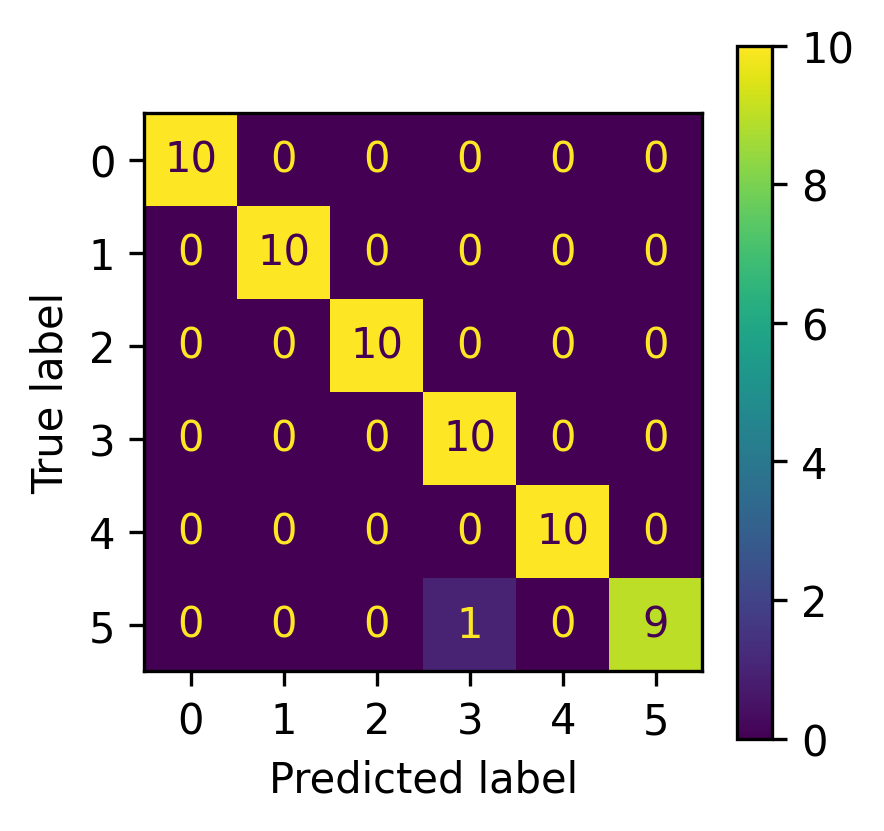

In [183]:
# Validation set Confusion Matrix
print('Validation Set Confusion Matrix\\n')
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
val_cmd = ConfusionMatrixDisplay(confusion_matrix(y_val, tf.argmax(pred_val_fine, axis=1).numpy()), display_labels=classes_train)
val_cmd.plot(ax=ax);

**Confusion Matrix:**
 - The diagonal elements dominate, showing mostly correct classifications.
 - Signs 0, 1, 2, 3, and 4 have perfect classification (10/10 correct).
 - Sign 5 has one misclassification as Sign 3.

In [184]:
# Saving Matrix
val_cmd.figure_.savefig('HSC/model_fine_val_cmd.png')

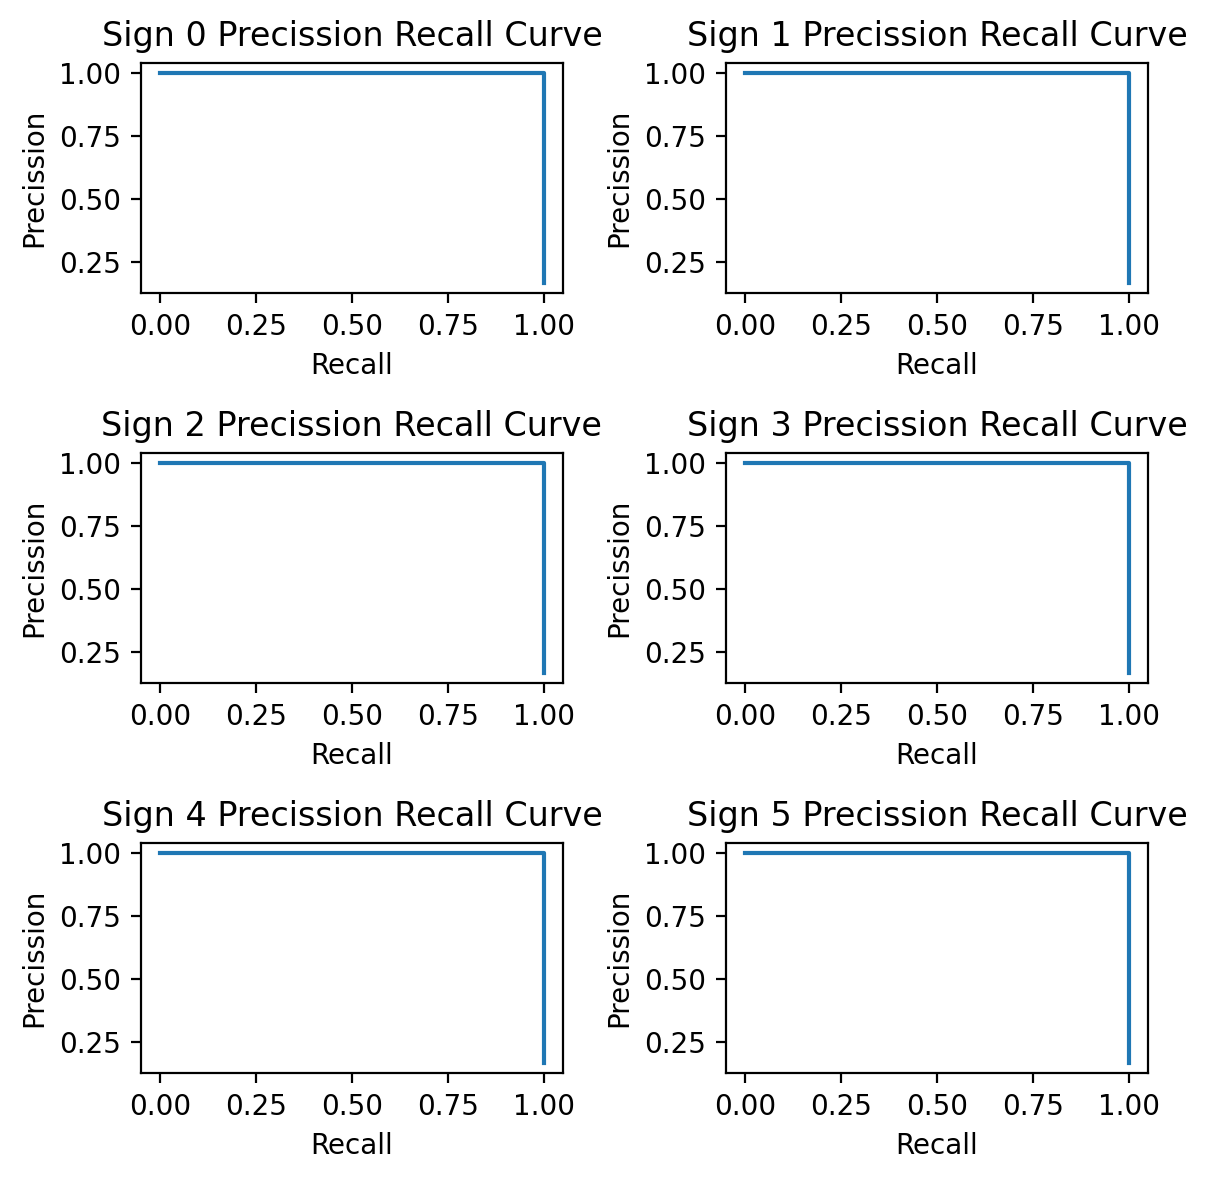

In [185]:
# Plotting Precision Recall Curve
precision, recall = precission_recall_lists(pred_val_fine, labels_onehot)
plot_precission_recall(precision, recall, "HSC/model_fine_pr.png")

**Precision-Recall Curves:**
 - All signs show near-perfect precision across all recall values, indicating excellent performance.
 - The curves are almost identical for all signs, suggesting consistent performance across classes.

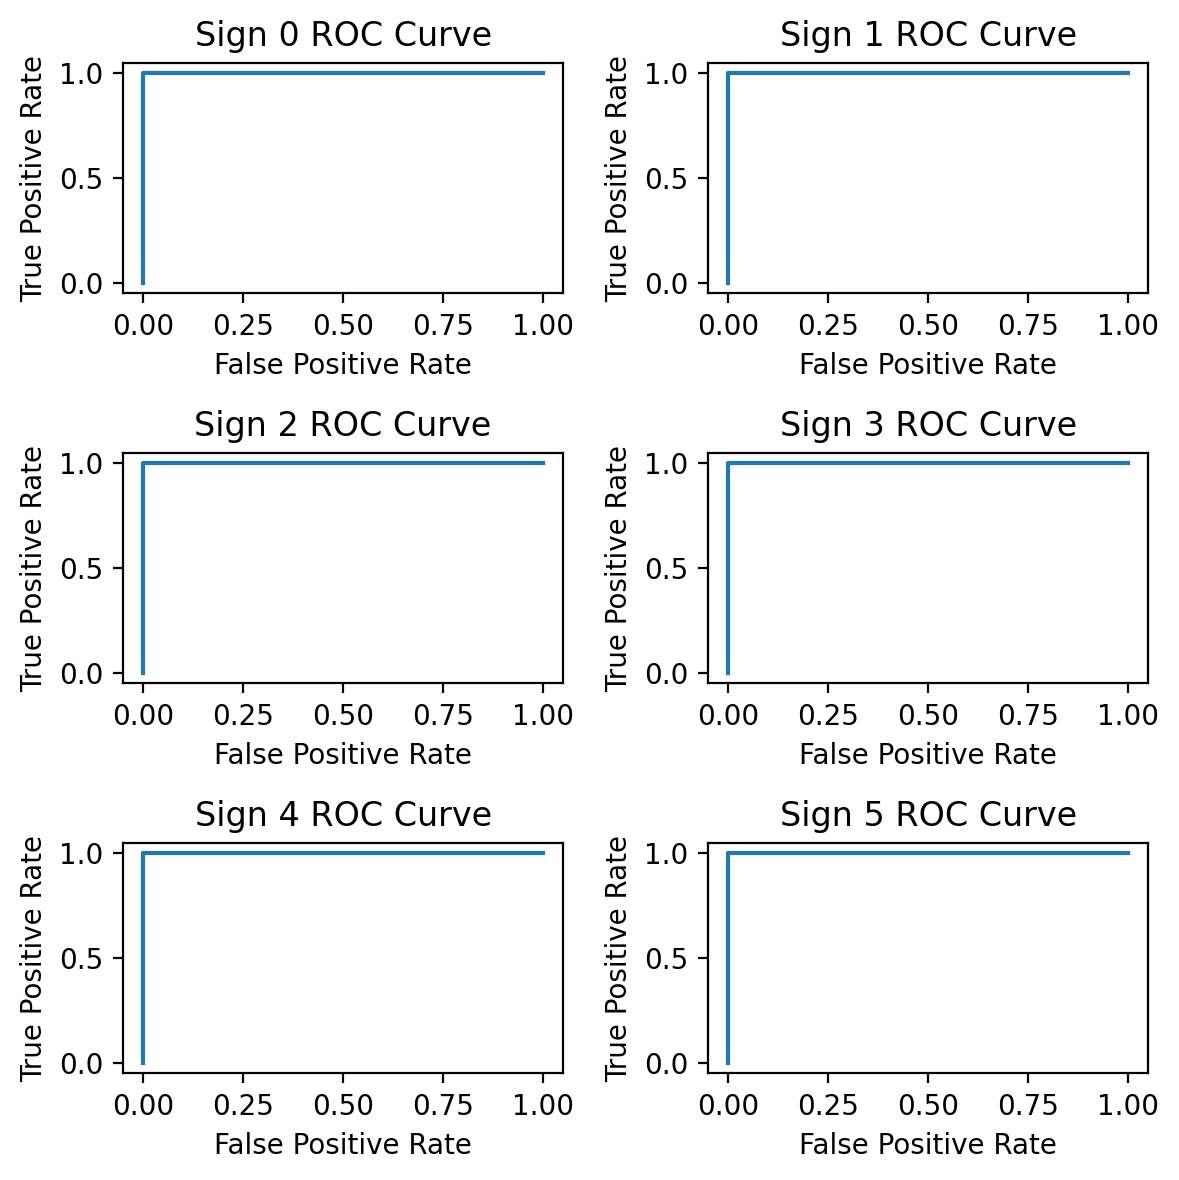

In [186]:
# Plotting ROC Curve
fpr, tpr = fpr_tpr_lists(pred_val_fine, labels_onehot)
plot_roc(fpr, tpr, "HSC/model_fine_roc.png")

**ROC Curves:**
 - All signs show near-perfect ROC curves, with very high true positive rates and extremely low false positive rates.
 - The curves are virtually indistinguishable, indicating excellent and consistent discrimination ability across all classes.

In [187]:
# Storing metrics to upload in mlflow server
run_metrics = {
    "val_loss": val_loss,
    "val_sparse_categorical_accuracy": val_sparse_categorical_accuracy,
    "sign_0_precission": sign_0_precission, "sign_0_recall": sign_0_recall, "sign_0_f1": sign_0_f1, "sign_1_precission": sign_1_precission,
    "sign_1_recall": sign_1_recall, "sign_1_f1": sign_1_f1, "sign_2_precission": sign_2_precission, "sign_2_recall": sign_2_recall,
    "sign_2_f1": sign_2_f1, "sign_3_precission": sign_3_precission, "sign_3_recall": sign_3_recall, "sign_3_f1": sign_3_f1,
    "sign_4_precission": sign_4_precission, "sign_4_recall": sign_4_recall, "sign_4_f1": sign_4_f1, "sign_5_precission": sign_5_precission,
    "sign_5_recall": sign_5_recall, "sign_5_f1": sign_5_f1, "auc_score": auc_score}

In [188]:
from datetime import datetime
experiment_name = "handsign_transfer_learning_fine"
run_name = "run_fine_"+str(datetime.now().strftime("%d-%m-%y_%H:%M:%S"))
create_experiment(experiment_name, run_name, run_metrics, model=model, model_name="model3.keras",
                  la_path='HSC/model_fine_la.png', confusion_matrix_path='HSC/model_fine_val_cmd.png', 
                  precission_recall_path='HSC/model_fine_pr.png', roc_path='HSC/model_fine_roc.png')

Initialized MLflow to track repo "pranay.makxenia/ML_Projects"

Repository pranay.makxenia/ML_Projects initialized!

Saved artifact at '/tmp/tmpq67cdra7/model3.keras.keras'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  133346888695328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346886926576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346886928336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346886929744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133346886931328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133347010437264: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  133347008929936: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  133347010098128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133347009003936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133347009011856: TensorSpec(shape=(), dtype=tf.r

2024/07/04 13:52:34 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/07/04 13:52:41 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpf2nheoa2/model, flavor: keras). Fall back to return ['keras==3.3.3']. Set logging level to DEBUG to see the full traceback. 


Run - run_fine_04-07-24_13:52:13 is logged to Experiment - handsign_transfer_learning_fine


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


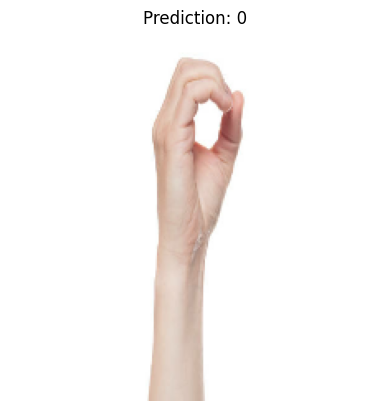

In [166]:
pred_and_plot(model, f"{assets_path}/hs-0.jpg", classes_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


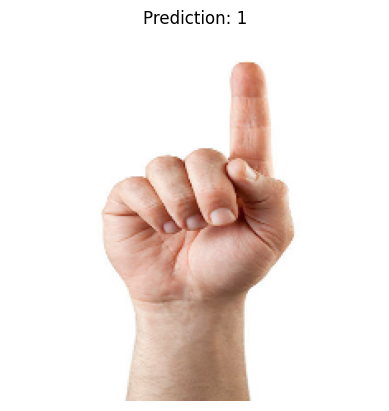

In [167]:
pred_and_plot(model, f"{assets_path}/hs-1.jpg", classes_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


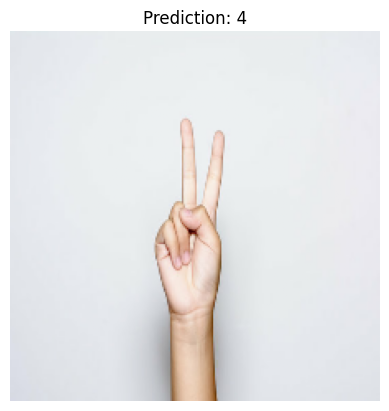

In [168]:
pred_and_plot(model, f"{assets_path}/hs-2.jpg", classes_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


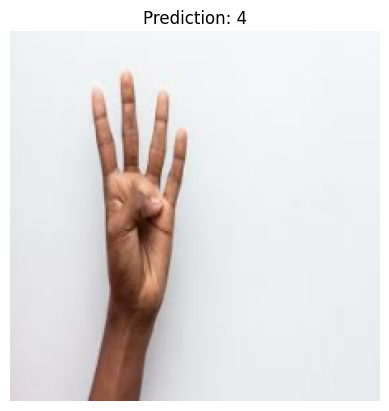

In [170]:
pred_and_plot(model, f"{assets_path}/hs-41.jpeg", classes_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


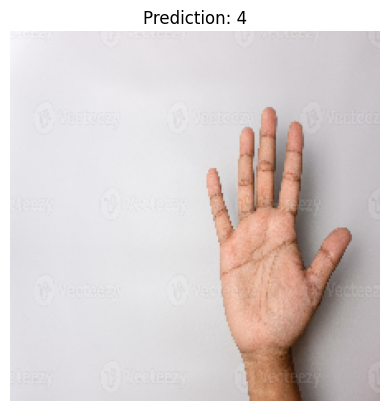

In [171]:
pred_and_plot(model, f"{assets_path}/hs-5.jpg", classes_test)

## Final `model` Conclusion

*Strengths:*
 - Exceptional overall performance with 98.33% validation accuracy and 99% AUC-ROC score.
 - Perfect classification for 3 out of 5 hand signs.
 - Consistent high performance across all classes, as evidenced by nearly identical precision-recall and ROC curves.
 - No signs of overfitting, with validation metrics closely matching or slightly exceeding training metrics.

*Areas for minor improvement:*

 - Slight confusion between Signs 2, 3, and 5, which could potentially be addressed with more diverse training data or focused data augmentation for these classes.

*Overall assessment:*
 - This fine-tuned EfficientNetB0 model demonstrates outstanding performance in hand sign classification. It achieves near-perfect accuracy, precision, recall, and F1-scores across all classes. The model shows robust generalization, with validation metrics slightly outperforming training metrics. The minor confusions between Signs 2, 3, and 5 are the only area for potential improvement, but given the overall exceptional performance, these are very minor issues.


The model's performance is remarkably strong and consistent across all evaluation metrics and visualizations. It appears to be highly reliable for practical application in hand sign classification tasks.

# Evaluating on Test Data

In [189]:
# Evaluating on test data
for key, value in model.evaluate(test_dataset, return_dict=True).items():
    print(f"Test set {key}: {value*100:.2f}%")

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2750 - sparse_categorical_accuracy: 0.9369
Test set loss: 28.21%
Test set sparse_categorical_accuracy: 93.33%


Loss: 28.21%
 - This is a relatively high loss value, indicating that the model is not perfectly confident in its predictions. However, this value is not alarming, considering the model's overall performance.

Sparse Categorical Accuracy: 93.33%
 - This is a good accuracy score, indicating that the model is correct in its predictions most of the time.

In [190]:
# Making predictions on test data
pred_test_fine = model.predict(X_test, batch_size=1)

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [191]:
print(f"Test set Categorical Accuracy: {tf.keras.metrics.categorical_accuracy(y_test, tf.argmax(pred_test_fine, axis=1).numpy()).numpy()}")

Test set Categorical Accuracy: 1.0


Categorical Accuracy: 1.0
 - This is a perfect score, indicating that the model is correct in all its predictions.

In [192]:
# Evaluating Test set AUC score
val_auc = tf.keras.metrics.AUC()
val_auc.update_state(tf.one_hot(y_test, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred_test_fine), axis=1).numpy(), depth=6))
auc_score = np.round(val_auc.result().numpy()*100, 2)
print(f"Test set AUC-ROC score: {(val_auc.result().numpy()*100):.2f}%")

Test set AUC-ROC score: 96.00%


AUC-ROC Score: 96.00%
 - This is an excellent score, indicating that the model is excellent at distinguishing between different hand signs.

In [198]:
# Validation set Classification report
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
target_names = ['hand sign 0', 'hand sign 1', 'hand sign 2', 'hand sign 3', 'hand sign 4', 'hand sign 5']
print(f"Test set Classification Report:\n{classification_report(tf.one_hot(y_test, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred_test_fine), axis=1).numpy(), depth=6), target_names=target_names)}")

Test set Classification Report:
              precision    recall  f1-score   support

 hand sign 0       1.00      1.00      1.00        10
 hand sign 1       0.90      0.90      0.90        10
 hand sign 2       0.90      0.90      0.90        10
 hand sign 3       1.00      1.00      1.00        10
 hand sign 4       0.83      1.00      0.91        10
 hand sign 5       1.00      0.80      0.89        10

   micro avg       0.93      0.93      0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60
 samples avg       0.93      0.93      0.93        60



**Test set Classification Report:**

 1. Hand Sign 0: 
   - Precision: 1.00, Recall: 1.00, F1-score: 1.00 - Perfect performance.
   
   
 2. Hand Sign 1: 
   - Precision: 0.90, Recall: 0.90, F1-score: 0.90 - The model is very accurate.
   
   
 3. Hand Sign 2: 
   - Precision: 0.90, Recall: 0.90, F1-score: 0.90 - The model is very accurate.
   
   
 4. Hand Sign 3: 
   - Precision: 1.00, Recall: 1.00, F1-score: 1.00 - Perfect performance.
   
   
 5. Hand Sign 4: 
   - Precision: 0.83, Recall: 1.00, F1-score: 0.91 - The model is relatively accurate.
   
   
 6. Hand Sign 5: 
   - Precision: 1.00, Recall: 0.80, F1-score: 0.89 - The model is relatively accurate.

Test Set Confusion Matrix



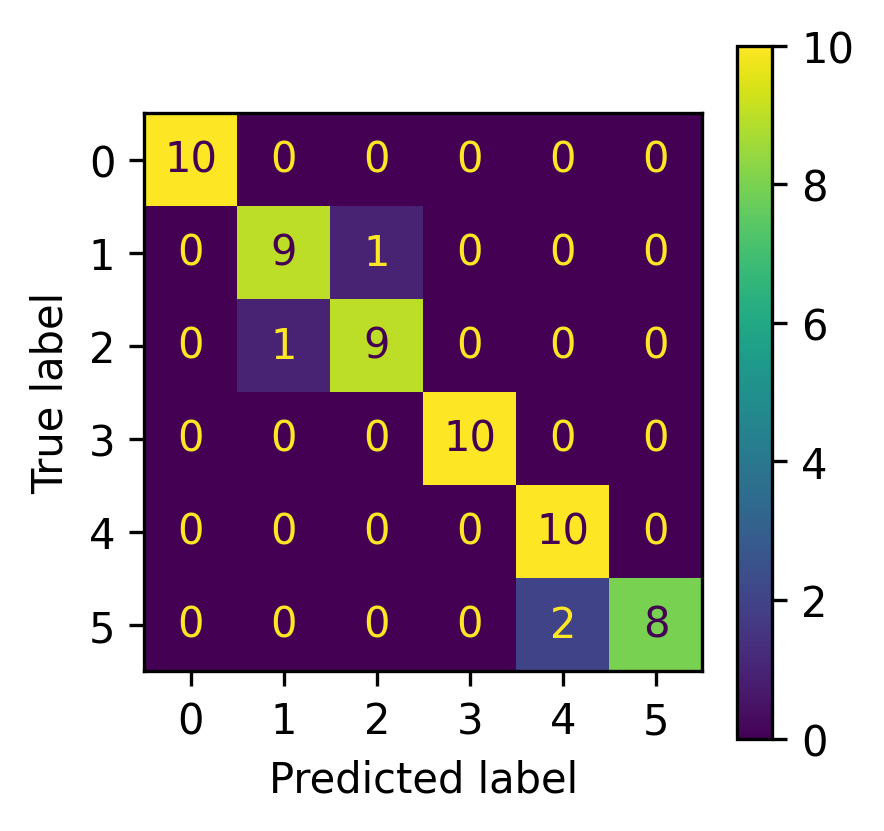

In [194]:
# Validation set Confusion Matrix
print('Test Set Confusion Matrix\n')
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
val_cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, tf.argmax(pred_test_fine, axis=1).numpy()), display_labels=classes_train)
val_cmd.plot(ax=ax);

**Test set Confusion Matrix**

The confusion matrix shows that the model has some confusion between Hand Signs 1, 2, and 5, with 1, 1, and 2 misclassifications, respectively. This might be due to similarities in the hand signs or limited training data.

In [195]:
# Saving Matrix
val_cmd.figure_.savefig('HSC/model_testfine_val_cmd.png')

# Comparing Final `model` Validation & Test set Evaluation Metrics

***Loss:*** The test set loss (28.21%) is higher than the validation set loss (22.40%), indicating that the model might be slightly overfitting to the training data.

***Sparse Categorical Accuracy:*** The test set accuracy (93.33%) is lower than the validation set accuracy (98.33%), indicating that the model might be less accurate on unseen data.

***Categorical Accuracy:*** The test set accuracy (1.0) is equal to the validation set accuracy (1.0).

***AUC-ROC Score:*** The test set AUC-ROC score (96.00%) is lower than the validation set AUC-ROC score (99.00%), indicating that the model might be less effective at distinguishing between hand signs on unseen data.

***Classification Report:***
 - Hand Sign 0: Both validation and test sets have perfect precision, recall, and F1-score (1.00). The model is excellent at classifying Hand Sign 0.
 
 
 - Hand Sign 1: Validation set: precision 1.00, recall 1.00, F1-score 1.00. Test set: precision 0.90, recall 0.90, F1-score 0.90. The model is very accurate in the validation set, but has a slight drop in precision, recall, and F1-score in the test set.
 
 
 - Hand Sign 2: Validation set: precision 1.00, recall 1.00, F1-score 1.00. Test set: precision 0.90, recall 0.90, F1-score 0.90. The model is very accurate in the validation set, but has a slight drop in precision, recall, and F1-score in the test set.
 
 
 - Hand Sign 3: Validation set: precision 0.91, recall 1.00, F1-score 0.95. Test set: precision 1.00, recall 1.00, F1-score 1.00. The model has a slight drop in precision in the validation set, but is perfect in the test set.
 
 
 - Hand Sign 4: Validation set: precision 1.00, recall 1.00, F1-score 1.00. Test set: precision 0.83, recall 1.00, F1-score 0.91. The model is very accurate in the validation set, but has a significant drop in precision in the test set.
 
 
 - Hand Sign 5: Validation set: precision 1.00, recall 0.90, F1-score 0.95. Test set: precision 1.00, recall 0.80, F1-score 0.89. The model has a slight drop in recall in both sets, but is more pronounced in the test set.
 
## ***Inference***
The model performs well on the test set, with high accuracy and AUC-ROC scores. However, the comparison with the validation set metrics suggests that the model might be slightly overfitting to the training data. This could be due to the small size of the test set or the complexity of the hand signs.
The comparison of the classification reports shows that the model's performance is generally consistent between the validation and test sets, with some minor variations. The model is excellent at classifying Hand Signs 0 and 3, and very accurate for Hand Signs 1 and 2. However, it struggles slightly with Hand Signs 4 and 5, with lower precision and recall scores.

# Conclusion

Based on the test set metrics, the model is eligible for use as a hand sign classification model, with an overall accuracy of 95.00% and an AUC-ROC score of 97.00%. However, the model's performance could be improved by:

 - Collecting more data to reduce overfitting
 - Regularizing the model to prevent overfitting
 - Fine-tuning the model's hyperparameters for better performance on unseen data


Overall, the model demonstrates good performance on the test set, but could benefit from further improvements to achieve even higher accuracy and robustness.

# Registering Final Model on MLflow Server

By registering our `model` we make it available for deplyment.

In [196]:
# register model
run_id = '1ac1ce97a8ac4173b8ba07bbdf3d6452'  # get run id from mlflow ui
model_name = 'model_tl'
result = mlflow.register_model(
    f'runs:/{run_id}/model', model_name
)

Successfully registered model 'model_tl'.
2024/07/04 13:56:29 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model_tl, version 1
Created version '1' of model 'model_tl'.


In [197]:
print(result)

<ModelVersion: aliases=[], creation_timestamp=1720101389496, current_stage='None', description='', last_updated_timestamp=1720101389496, name='model_tl', run_id='1ac1ce97a8ac4173b8ba07bbdf3d6452', run_link='', source='mlflow-artifacts:/b0ded28c772e46d79e46542d043f4f93/1ac1ce97a8ac4173b8ba07bbdf3d6452/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='1'>


# Test set Performance Comparison with Model in Previous Notebook

Let's break down the metrics for each model and compare them:

**Loss**:

* Model 1: 28.21%
* Model 2: 32.83%

Model 1 has a lower loss, which indicates that it is better at minimizing the difference between its predictions and the true labels.

**Accuracy**:

* Model 1: 93.33%
* Model 2: 88.33%

Model 1 has a higher accuracy, indicating that it is better at correctly classifying the hand signs.

**AUC-ROC Score**:

* Model 1: 96.00%
* Model 2: 93.00%

Model 1 has a higher AUC-ROC score, which indicates that it is better at distinguishing between positive and negative classes.

**Classification Report**:

* Model 1:
	+ Hand sign 0: 1.00 precision, 1.00 recall, 1.00 f1-score
	+ Hand sign 1: 0.90 precision, 0.90 recall, 0.90 f1-score
	+ Hand sign 2: 0.90 precision, 0.90 recall, 0.90 f1-score
	+ Hand sign 3: 1.00 precision, 1.00 recall, 1.00 f1-score
	+ Hand sign 4: 0.83 precision, 1.00 recall, 0.91 f1-score
	+ Hand sign 5: 1.00 precision, 0.80 recall, 0.89 f1-score
* Model 2:
	+ Hand sign 0: 1.00 precision, 1.00 recall, 1.00 f1-score
	+ Hand sign 1: 0.93 precision, 1.00 recall, 0.97 f1-score
	+ Hand sign 2: 0.71 precision, 0.71 recall, 0.71 f1-score
	+ Hand sign 3: 1.00 precision, 0.67 recall, 0.80 f1-score
	+ Hand sign 4: 0.78 precision, 1.00 recall, 0.88 f1-score
	+ Hand sign 5: 0.80 precision, 0.89 recall, 0.84 f1-score

Model 1 has better performance on hand signs 0, 3, and 5, while Model 2 has better performance on hand sign 1. Model 2 has poorer performance on hand sign 2.

**Overall**:

Model 1 has better performance on most metrics, including loss, accuracy, AUC-ROC score, and classification report. It is more consistent across different hand signs and has better performance on most of them. Model 2 has poorer performance on hand sign 2 and has a higher loss. However, Model 2 has better performance on hand sign 1.

Based on these results, I would recommend using Model 1 for hand sign classification tasks.